# Census Income

# Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

*1.	A single cell estimate of the population 16+ for each state.*

*2.	Controls for Hispanic Origin by age and sex.*

*3.	Controls by Race, age and sex.*

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


# Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

# Answer:-

In [78]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [79]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Exploratory Data Analysis(EDA)

In [80]:
#Checking the dimension of the dataset
df.shape

(32560, 15)

**Here you can see our Dataset has 32536 rows and 15 columns.**

In [81]:
#Checking every column names present in this dataset 
df.columns.to_list()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

In [82]:
#Checking for duplicated row in the Dataset
df.duplicated().sum()

24

**Here you can see here 24 duplicate row is present in the dataset and we have to delete those.**

In [83]:
#Checking duplicated rows
duplicated_row=df.loc[df.duplicated()].transpose()
duplicated_row

,4880,5103,9170,11630,13083,15058,17039,18554,18697,21317,...,22493,25871,26312,28229,28521,28845,29156,30844,31992,32403
Age,25,90,21,20,25,21,46,30,19,19,...,49,23,28,27,42,39,38,46,19,35
Workclass,Private,Private,Private,Private,Private,Private,Private,Private,Private,Private,...,Self-emp-not-inc,Private,Private,Private,Private,Private,Private,Private,Private,Private
Fnlwgt,308144,52386,250051,107658,195994,243368,173243,144593,97261,138153,...,43479,240137,274679,255582,204235,30916,207202,133616,251579,379959
Education,Bachelors,Some-college,Some-college,Some-college,1st-4th,Preschool,HS-grad,HS-grad,HS-grad,Some-college,...,Some-college,5th-6th,Masters,HS-grad,Some-college,HS-grad,HS-grad,Some-college,Some-college,HS-grad
Education_num,13,10,10,10,2,1,9,9,9,10,...,10,3,14,9,10,9,9,10,10,9
Marital_status,Never-married,Never-married,Never-married,Never-married,Never-married,Never-married,Married-civ-spouse,Never-married,Never-married,Never-married,...,Married-civ-spouse,Never-married,Never-married,Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Divorced,Never-married,Divorced
Occupation,Craft-repair,Other-service,Prof-specialty,Tech-support,Priv-house-serv,Farming-fishing,Craft-repair,Other-service,Farming-fishing,Adm-clerical,...,Craft-repair,Handlers-cleaners,Prof-specialty,Machine-op-inspct,Prof-specialty,Craft-repair,Machine-op-inspct,Adm-clerical,Other-service,Other-service
Relationship,Not-in-family,Not-in-family,Own-child,Not-in-family,Not-in-family,Not-in-family,Husband,Not-in-family,Not-in-family,Own-child,...,Husband,Not-in-family,Not-in-family,Not-in-family,Husband,Husband,Husband,Unmarried,Own-child,Not-in-family
Race,White,Asian-Pac-Islander,White,White,White,White,White,Black,White,White,...,White,White,White,White,White,White,White,White,White,White
Sex,Male,Male,Female,Female,Female,Male,Male,Male,Male,Female,...,Male,Male,Male,Female,Male,Male,Male,Female,Male,Female


In [84]:
#Checking duplicated rows indexes
duplicated_row_numbers = df.loc[df.duplicated()].index
duplicated_row_numbers

Int64Index([ 4880,  5103,  9170, 11630, 13083, 15058, 17039, 18554, 18697,
            21317, 21489, 21874, 22299, 22366, 22493, 25871, 26312, 28229,
            28521, 28845, 29156, 30844, 31992, 32403],
           dtype='int64')

In [85]:
#Droping duplicated rows
df.drop(duplicated_row_numbers,inplace=True)

In [86]:
#Checking for duplicated rows again
df.duplicated().sum()

0

**Now you can see there are no duplicated row is present.**

In [87]:
#Checking null values for each columns
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

**No column has null values.**

<Axes: >

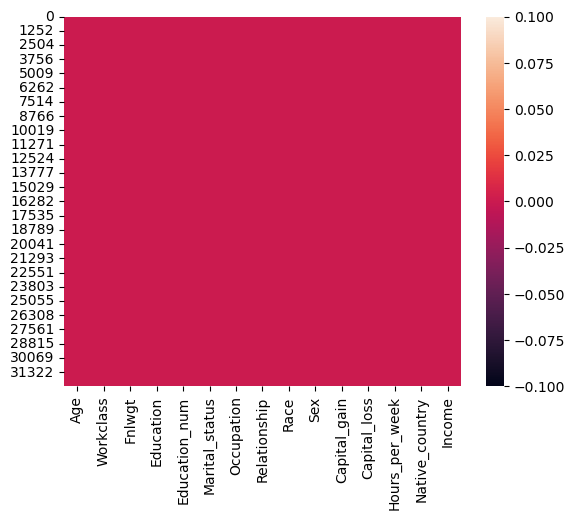

In [88]:
#Lets visualize null value using heatmap
sns.heatmap(df.isnull())

In [89]:
#Checking info of df DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


**Observation:-**

*1) Here you can see 6 columns contain integer values and 9 columns have the string type values.*

*2) Memory usage is 4.0+ MB.*

*3) <class 'pandas.core.frame.DataFrame'> indecates that these details are about the DataFrame.*

*4) Here no null value is present.*

In [90]:
#Checking unique values for each columns
df.nunique().to_frame("Unique value counts")

,Unique value counts
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


**Observation:-**
    
*1) Here you can see Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex and Income columns has the high difference between it's value counts with it's unique value counts that means these columns have categorical data.*

*2) Income is out Target column and as you can see difference between it's value counts with it's unique value counts is very high that means it's a classification problem.* 

In [91]:
#Value counts for each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype

**Observation:-**

*1) Here you can see no column has blank value.*

*2) Here you can see Native_country,Occupation and Workclass columns has some value as "?" and I will change this "?" sign with "Other".*

*3) Our Target column that is Income has a class imbalance issue and we have to solve that class imbalance issue with SMOTE in later part.*

In [92]:
#Change the ? value with "Other" for Native_country,Occupation and Workclass columns
df["Native_country"]=df["Native_country"].replace(" ?","Other")
df["Occupation"]=df["Occupation"].replace(" ?","Other")
df["Workclass"]=df["Workclass"].replace(" ?","Other")

In [93]:
#Checking Native_country column's value count
df["Native_country"].value_counts()

 United-States                 29152
 Mexico                          639
Other                            582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

**Now you can see  Native_country column has Other value instead of ?.**

In [94]:
#Checking description of Dataset
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Observation:-**

*1) Here we can see only those columns statestical data is shown which has numerical value.*

*2) And for all these columns has higher mean value than Midean(50%) that means these column's data has right skewed.*

*3) We can see there is high difference between 75 percentile and Max for all columns that means these columns might have outliers.*

# Deleting unnecessary columns

**Here we can see Education_num column is just encoded version of Education column so we can delete it.**

In [95]:
#Deleting the Education_num column
df.drop("Education_num",axis=1,inplace=True)

In [96]:
df.head(3)

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


**Here you can see Education_num column is deleted.**

# Visualization

**Univariate Analysis**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, 'Other'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

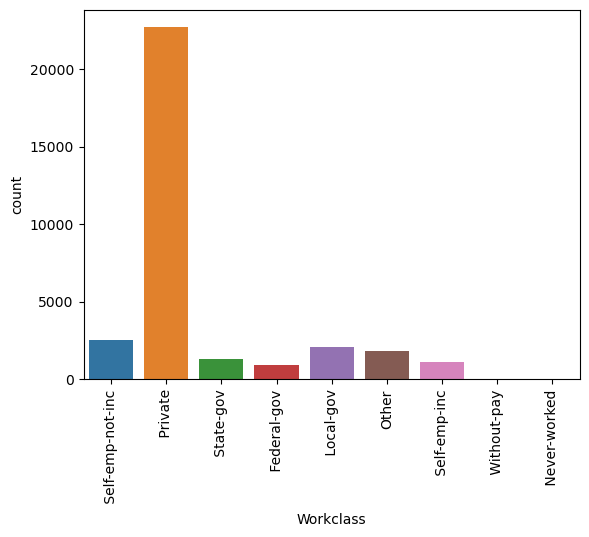

In [97]:
#Analysng Workclass
sns.countplot(x="Workclass",data=df)
plt.xticks(rotation=90)


**Here you can see those who are work in private sector has the high count and very less or almost no person are there who never worked or worked without pay.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

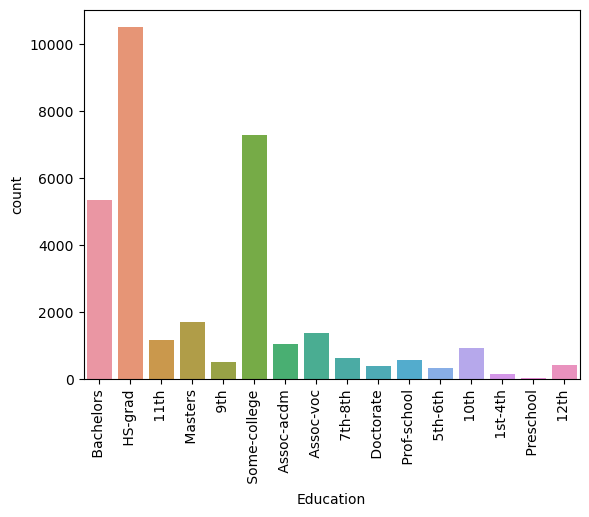

In [98]:
#Analysisn Education column
sns.countplot(x="Education",data=df)
plt.xticks(rotation=90)

**Here you can see most of the person are HS graduate followed by the Some-college and very less people are there who take the education till pre school.**

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

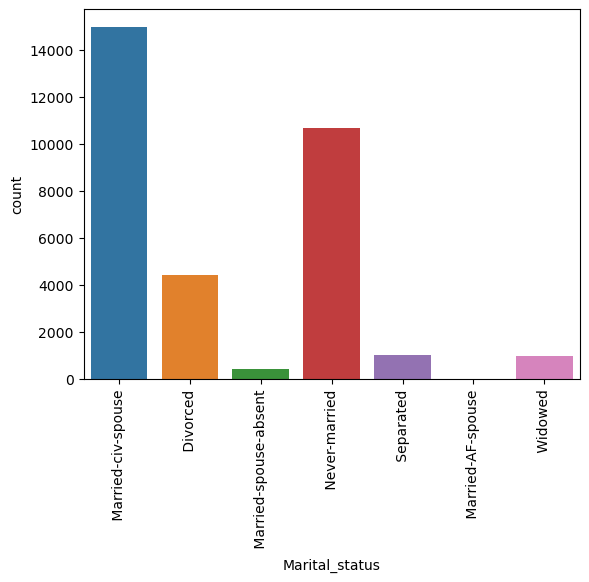

In [99]:
#Analysisn Marital_status column
sns.countplot(x="Marital_status",data=df)
plt.xticks(rotation=90)

**Here you can see most of the persons are married followed by Never married person count.And very less people are their who's spouse works for Armed forces **

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, 'Other'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

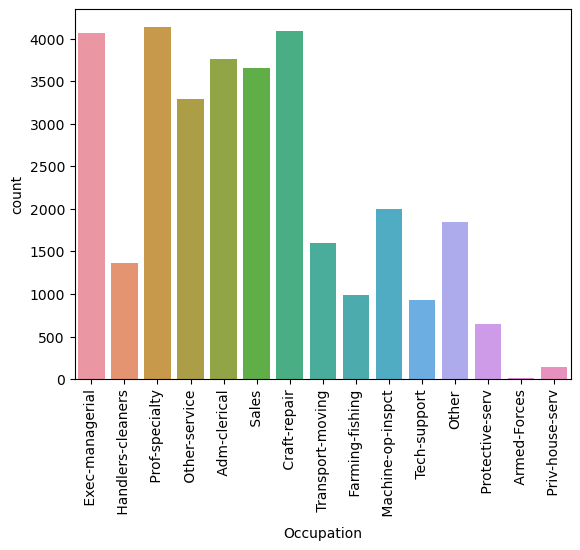

In [100]:
#Analysisn Occupation column
sns.countplot(x="Occupation",data=df)
plt.xticks(rotation=90)

**Here you can see most of the people working in Craft-repair,Prof-specialty and Exec-managerial and very less people are working for Armed-Forces.** 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

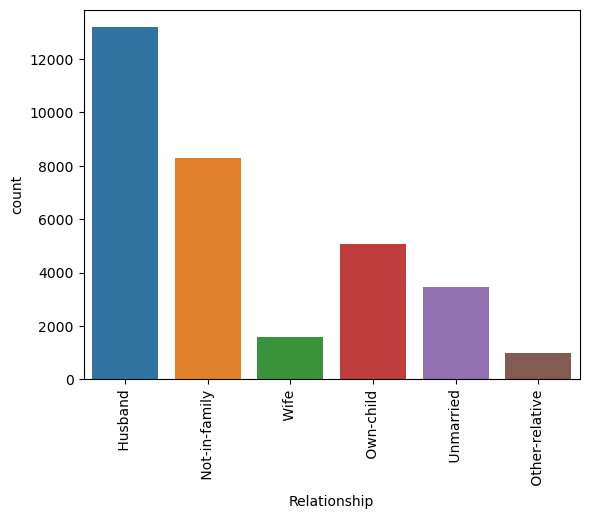

In [101]:
#Analysisn Relationship column
sns.countplot(x="Relationship",data=df)
plt.xticks(rotation=90)

**Most for the people are Husband and very less people are Other relative.**

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

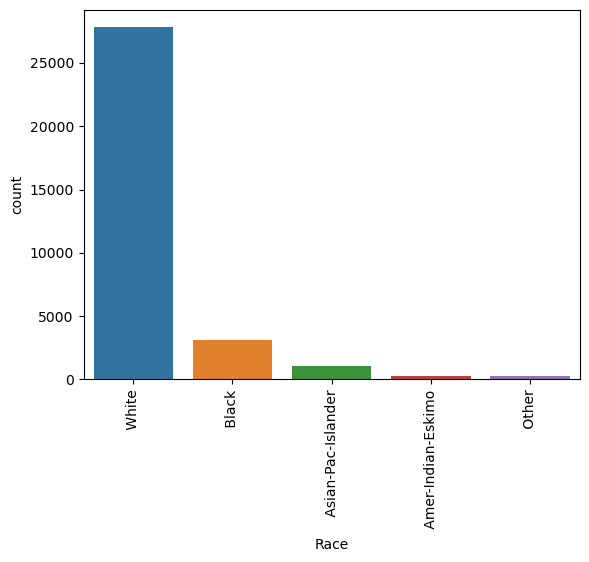

In [102]:
#Analysisn Race column
sns.countplot(x="Race",data=df)
plt.xticks(rotation=90)

**Maximum people are belong toward white category and very few people are from Other or Amer-Indian-Eskimo.**

(array([0, 1]), [Text(0, 0, ' Male'), Text(1, 0, ' Female')])

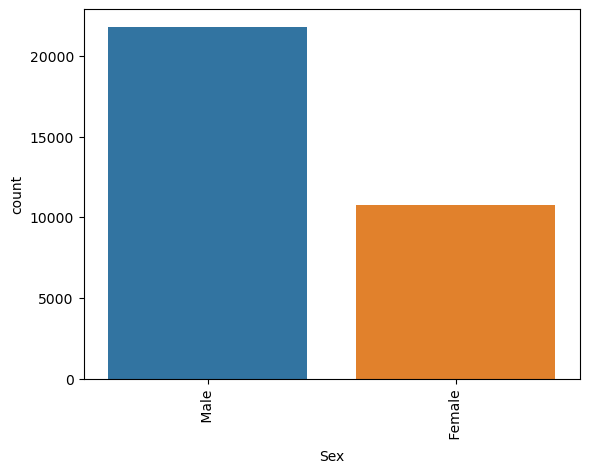

In [103]:
#Analysisn Sex column
sns.countplot(x="Sex",data=df)
plt.xticks(rotation=90)

**So here you can see most of the person are Male.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, 'Other'),
  Text(5, 0, ' Mexico'),
  Text(6, 0, ' South'),
  Text(7, 0, ' Puerto-Rico'),
  Text(8, 0, ' Honduras'),
  Text(9, 0, ' England'),
  Text(10, 0, ' Canada'),
  Text(11, 0, ' Germany'),
  Text(12, 0, ' Iran'),
  Text(13, 0, ' Philippines'),
  Text(14, 0, ' Italy'),
  Text(15, 0, ' Poland'),
  Text(16, 0, ' Columbia'),
  Text(17, 0, ' Cambodia'),
  Text(18, 0, ' Thailand'),
  Text(19, 0, ' Ecuador'),
  Text(20, 0, ' Laos'),
  Text(21, 0, ' Taiwan'),
  Text(22, 0, ' Haiti'),
  Text(23, 0, ' Portugal'),
  Text(24, 0, ' Dominican-Republic'),
  Text(25, 0, ' El-Salvador'),
  Text(26, 0, ' France'),
  Text(27, 0, ' Guatemala'),
  Text(28, 0, ' China'),
  Text(29, 0, ' Japan'),

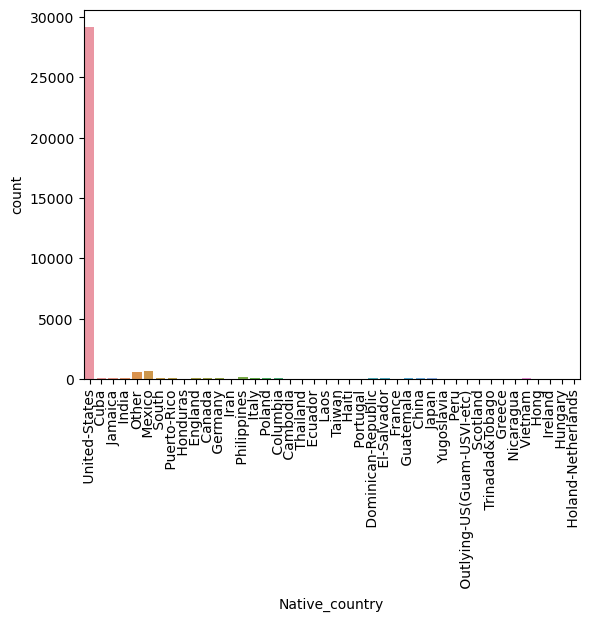

In [104]:
#Analysisn Native_country column
sns.countplot(x="Native_country",data=df)
plt.xticks(rotation=90)

**Here you can see maximum people are from USA and very very less people are from other country.**

**Bivariate Analysis**

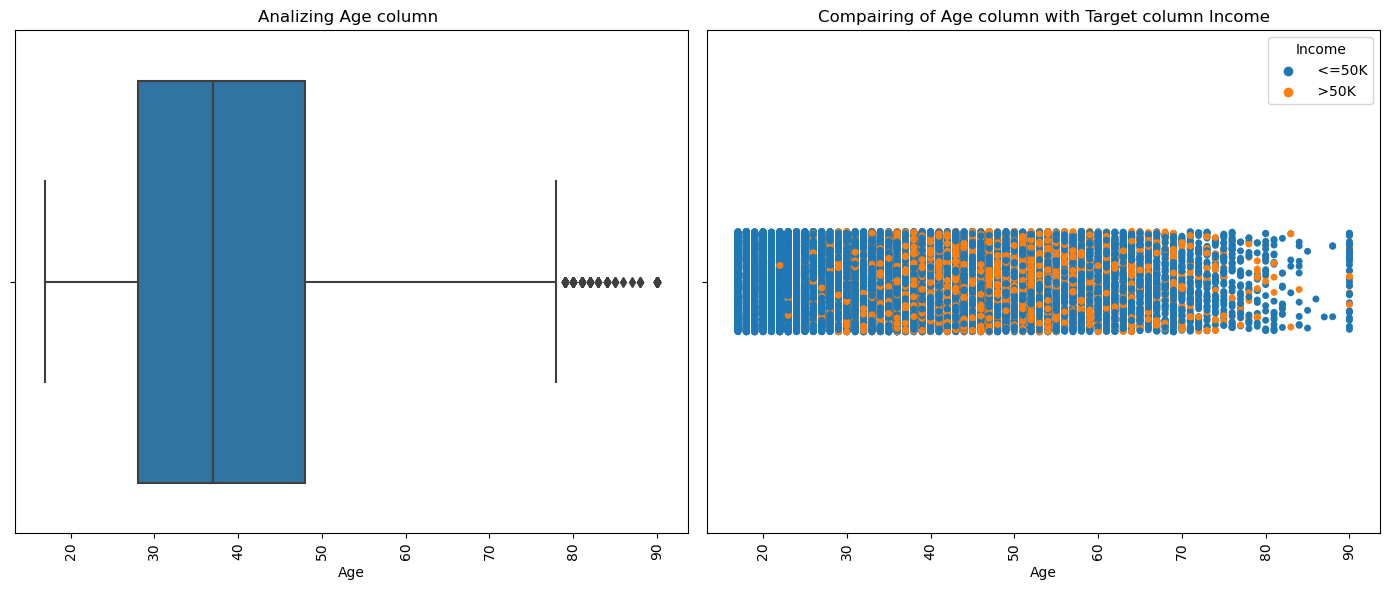

In [105]:
#Analysing Age column with Target column Income
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

sns.boxplot(x="Age", data=df)
plt.title("Analizing Age column ")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.stripplot(x="Age", data=df,hue="Income")
plt.title("Compairing of Age column with Target column Income")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observation:-**
    
*1) Maximum Age is above 90 and minimum Age be like 13 and Age column also has outliers.*

*2) Also you can see those who has age between 35 to 65 have high chance of earning 50K.*

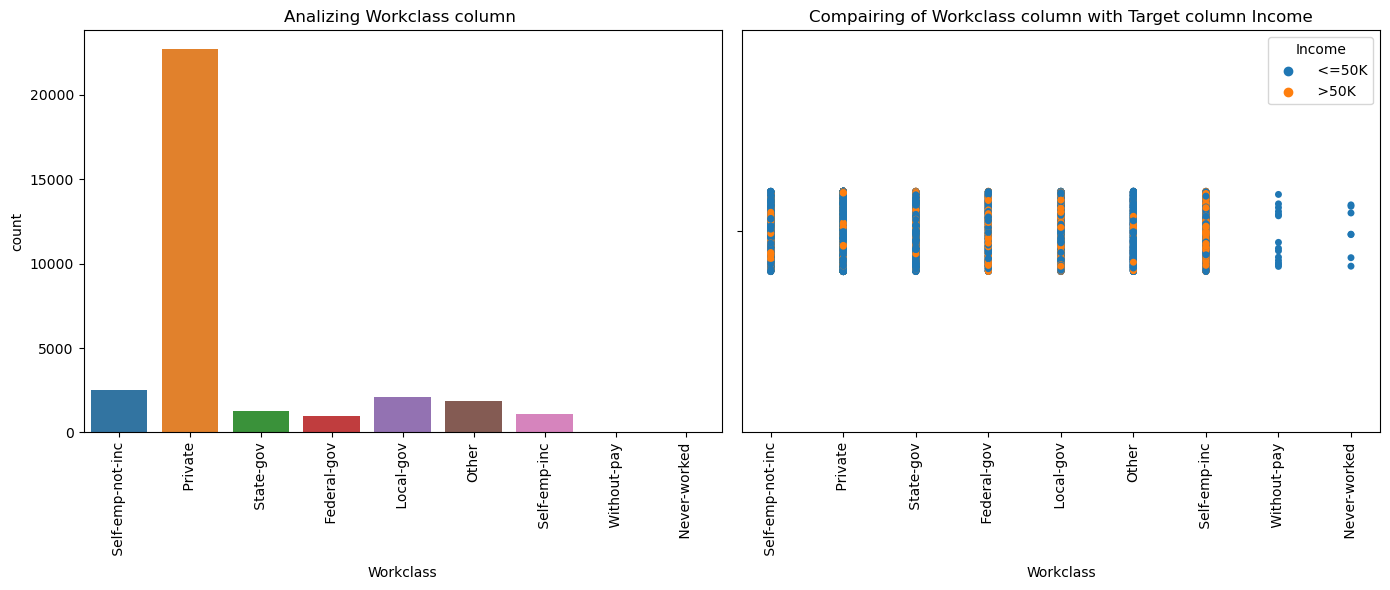

In [106]:
#Analysing Workclass column with Target column Income
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

sns.countplot(x="Workclass", data=df)
plt.title("Analizing Workclass column ")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.stripplot(x="Workclass", data=df,hue="Income")
plt.title("Compairing of Workclass column with Target column Income")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observation:-**
    
*1) Those person who Never worked or Working without pay they have no chance to earn more than 50k.*

*2) Person who works under State gov or Other they have very less chance to to earn more than 50K.*

*3) Other than these profession I mentioned above all other professions have a good chance to earn above 50K.*

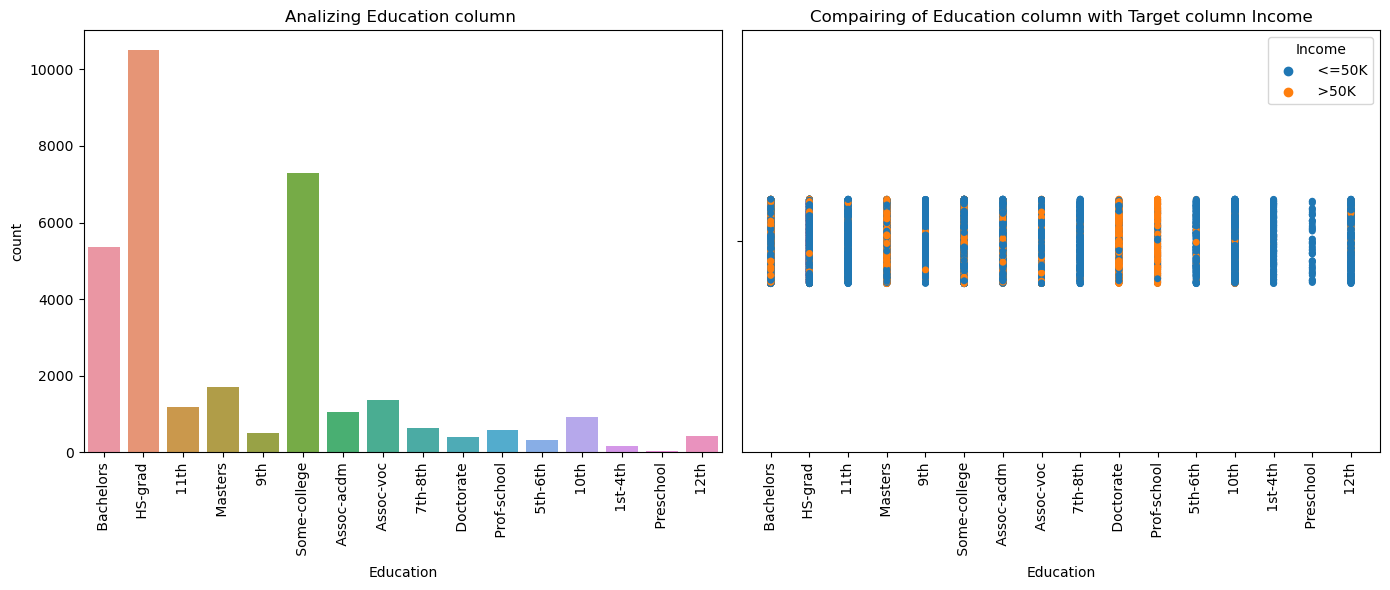

In [107]:
#Analysing Education column with Target column Income
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

sns.countplot(x="Education", data=df)
plt.title("Analizing Education column ")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.stripplot(x="Education", data=df,hue="Income")
plt.title("Compairing of Education column with Target column Income")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observation:-**

*1) Here you can see person who completed their Bachelors,Masters,Doctorate or Prof School they have a high potential of earn above 50K a year.*

*2) When education lavel increases the chances of earning above 50K in a year is also increases.*

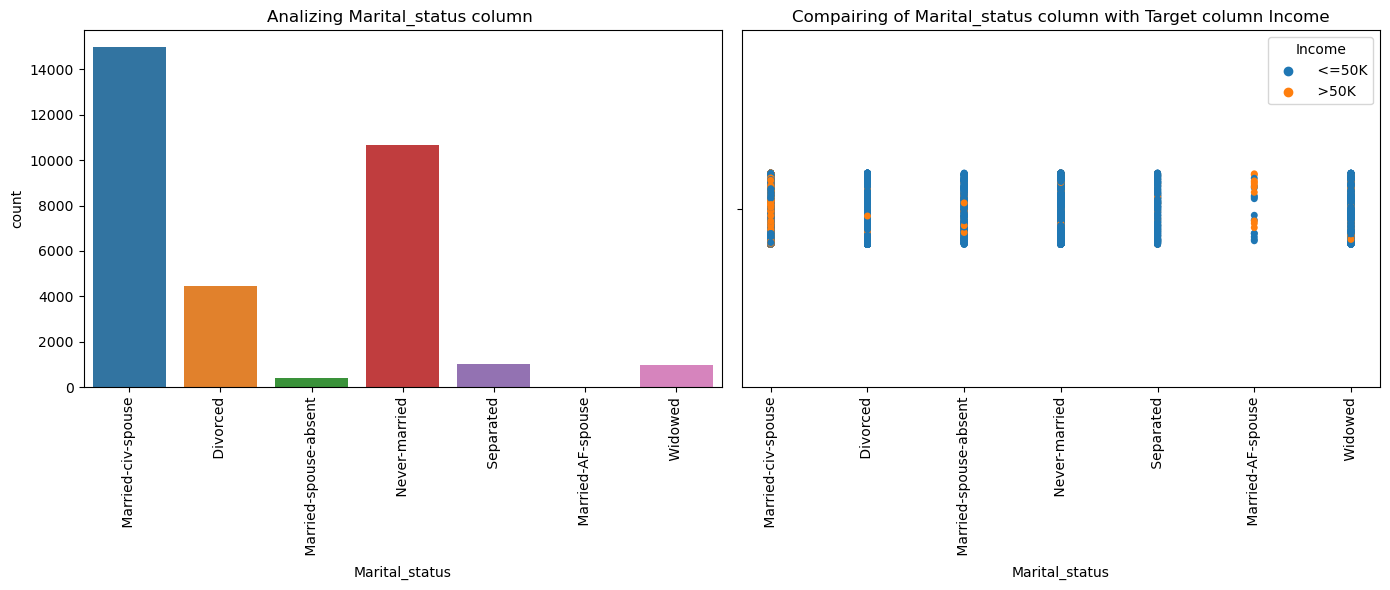

In [108]:
#Analysing Marital_status column with Target column Income
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

sns.countplot(x="Marital_status", data=df)
plt.title("Analizing Marital_status column ")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.stripplot(x="Marital_status", data=df,hue="Income")
plt.title("Compairing of Marital_status column with Target column Income")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observation:-**

*1) Here you can see married person have a good mchach to earn 50K in a year.*

*2) Separated people have no chance to earn more than 50K in a year.*

*3) Even Widows have a chance to earn more than 50K in a year.*

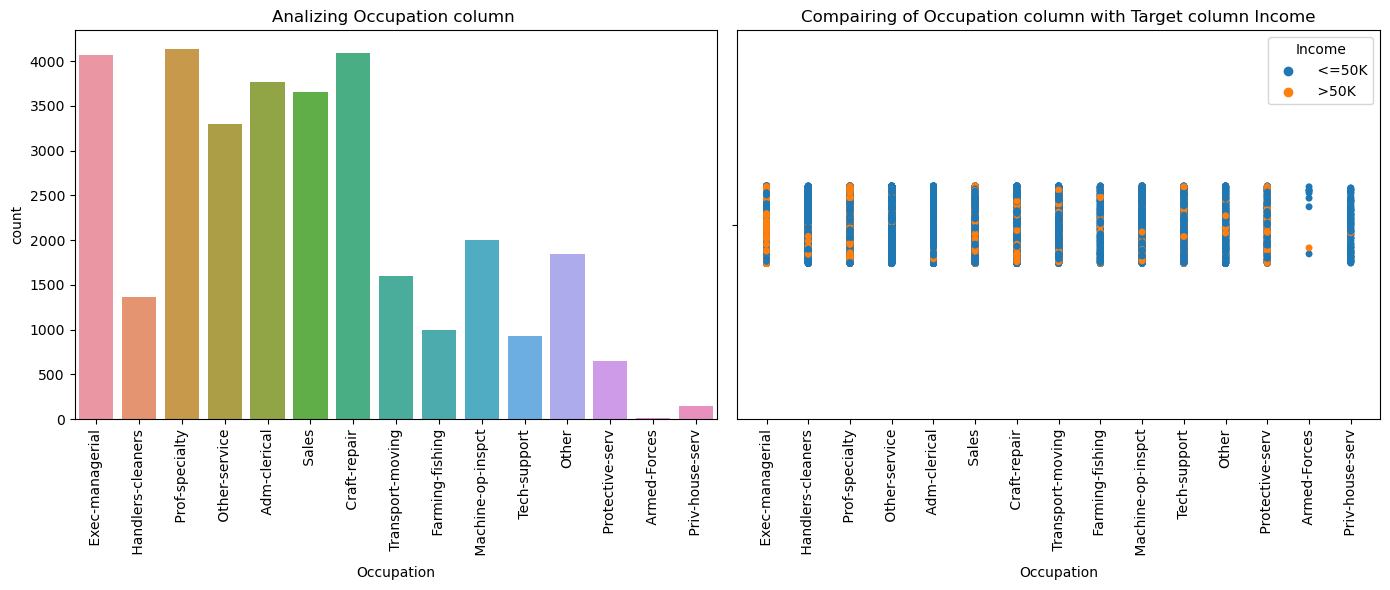

In [109]:
#Analysing Occupation column with Target column Income
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

sns.countplot(x="Occupation", data=df)
plt.title("Analizing Occupation column ")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.stripplot(x="Occupation", data=df,hue="Income")
plt.title("Compairing of Occupation column with Target column Income")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observation:-**
    
*1) Person who works on Private House keeping service they have absolutely 0 chance of earning above 50K in a year.*

*2) Except Private House keeping service all other Occupation has a chance of earning above 50K in a year and those person who's occupation are Exec-Manager they have a high potential of earning above 50k in a month.* 

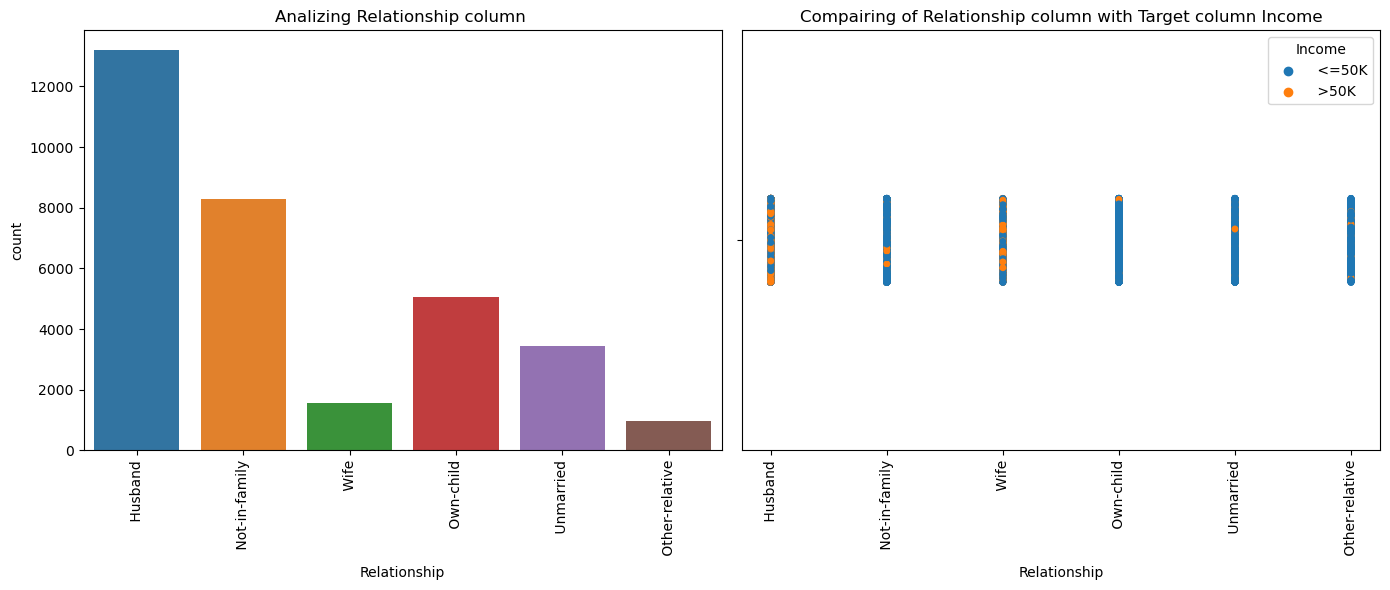

In [110]:
#Analysing Relationship column with Target column Income
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

sns.countplot(x="Relationship", data=df)
plt.title("Analizing Relationship column ")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.stripplot(x="Relationship", data=df,hue="Income")
plt.title("Compairing of Relationship column with Target column Income")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observation:-**
    
*1) Unmarried person have very less chance to earn more than 50k in a year.*

*2) Both Husband and Wife relation have high chance of earning more than 50k in a year.*

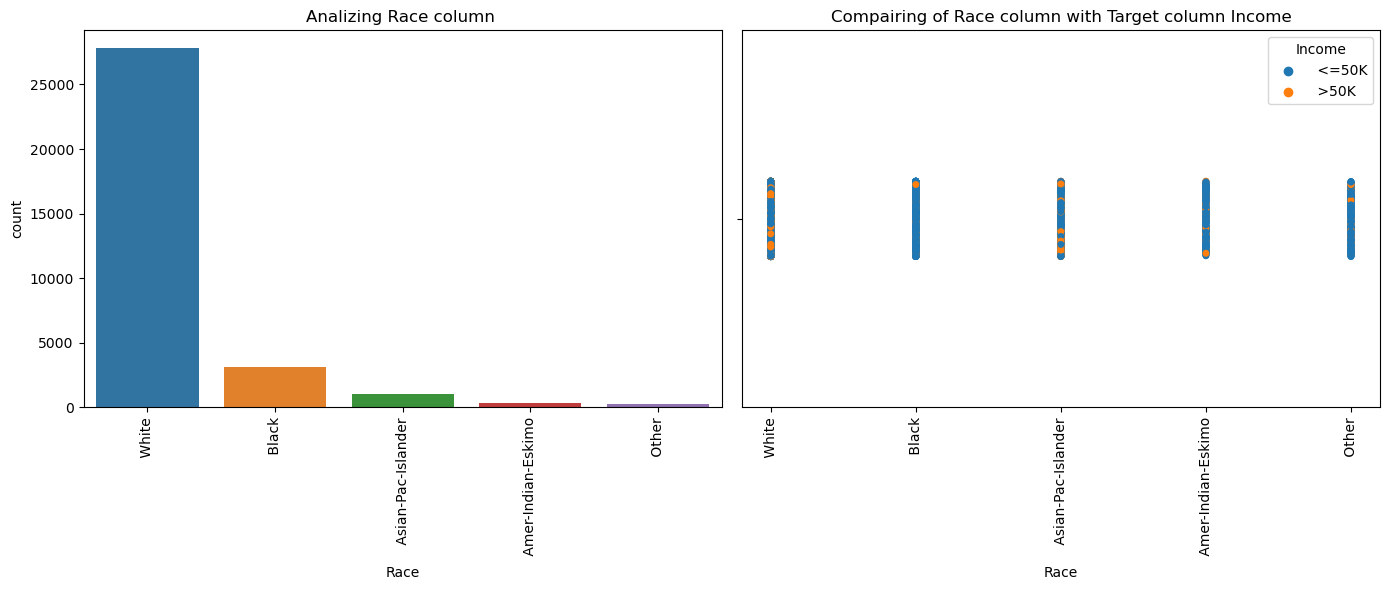

In [111]:
#Analysing Race column with Target column Income
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

sns.countplot(x="Race", data=df)
plt.title("Analizing Race column ")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.stripplot(x="Race", data=df,hue="Income")
plt.title("Compairing of Race column with Target column Income")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Obsevation:-**
    
*1) People those are from Black ethenicity has less chance to earn more than 50k in a year.*

*2) White and Asian-Pac-Islander people have a good chance of earning 50k in a year.*

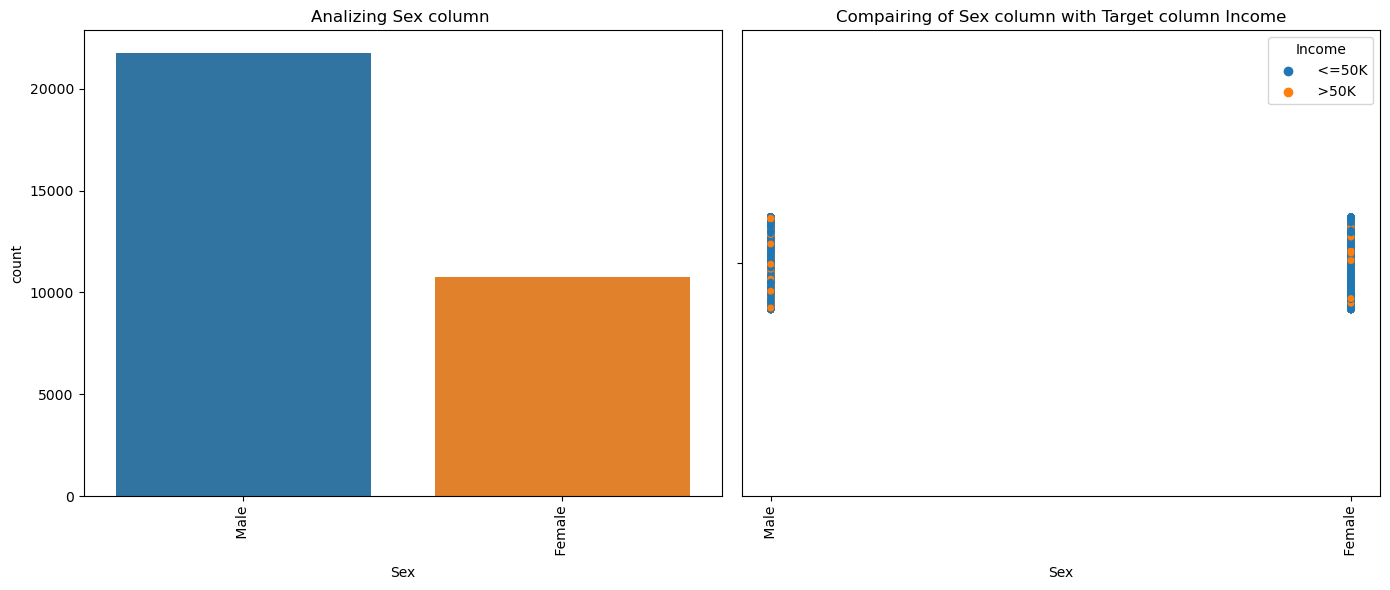

In [112]:
#Analysing Sex column with Target column Income
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

sns.countplot(x="Sex", data=df)
plt.title("Analizing Sex column ")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.stripplot(x="Sex", data=df,hue="Income")
plt.title("Compairing of Sex column with Target column Income")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observation:-**
    
*1) Here you can see Male has a slightly a better chance to earn more than 50K in a year but both Male and Female's chance are almost equal.*

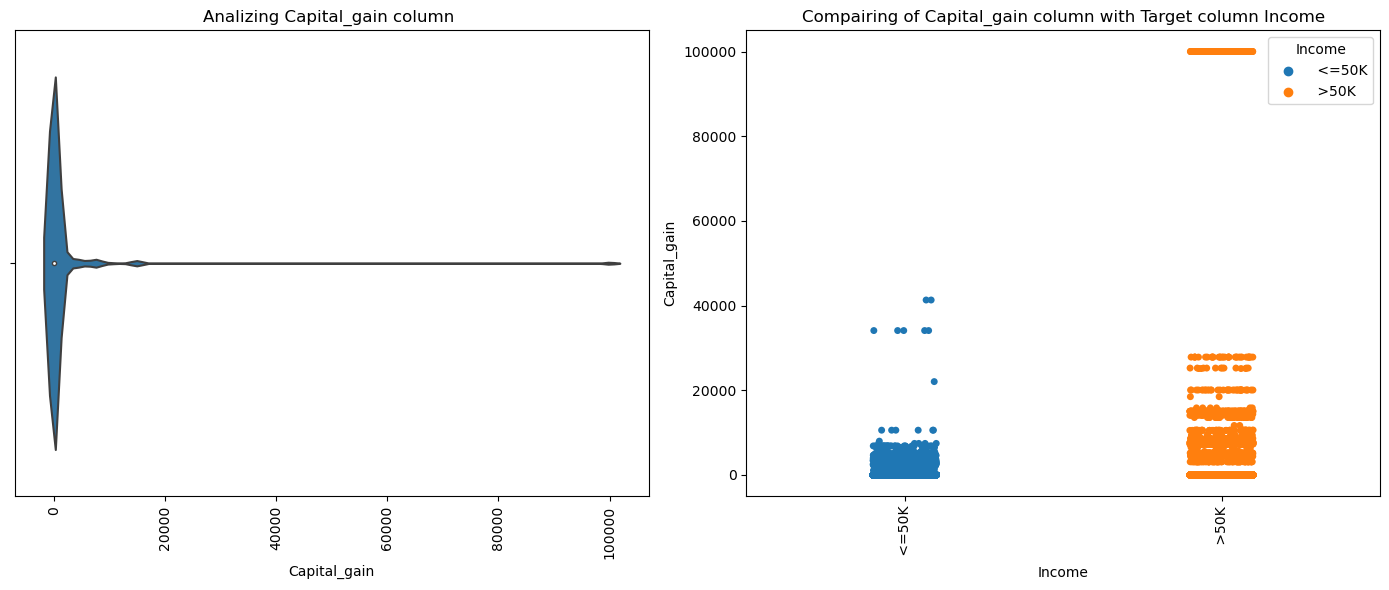

In [113]:
#Analysing Capital_gain column with Target column Income
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

sns.violinplot(x="Capital_gain", data=df)
plt.title("Analizing Capital_gain column ")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.stripplot(x="Income",y="Capital_gain",data=df,hue="Income")
plt.title("Compairing of Capital_gain column with Target column Income")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observation:-** 
    
*1) Most number of people don't have any capital gain.*

*2) If capital gain increases then it's easy to make above 50k in a year.*

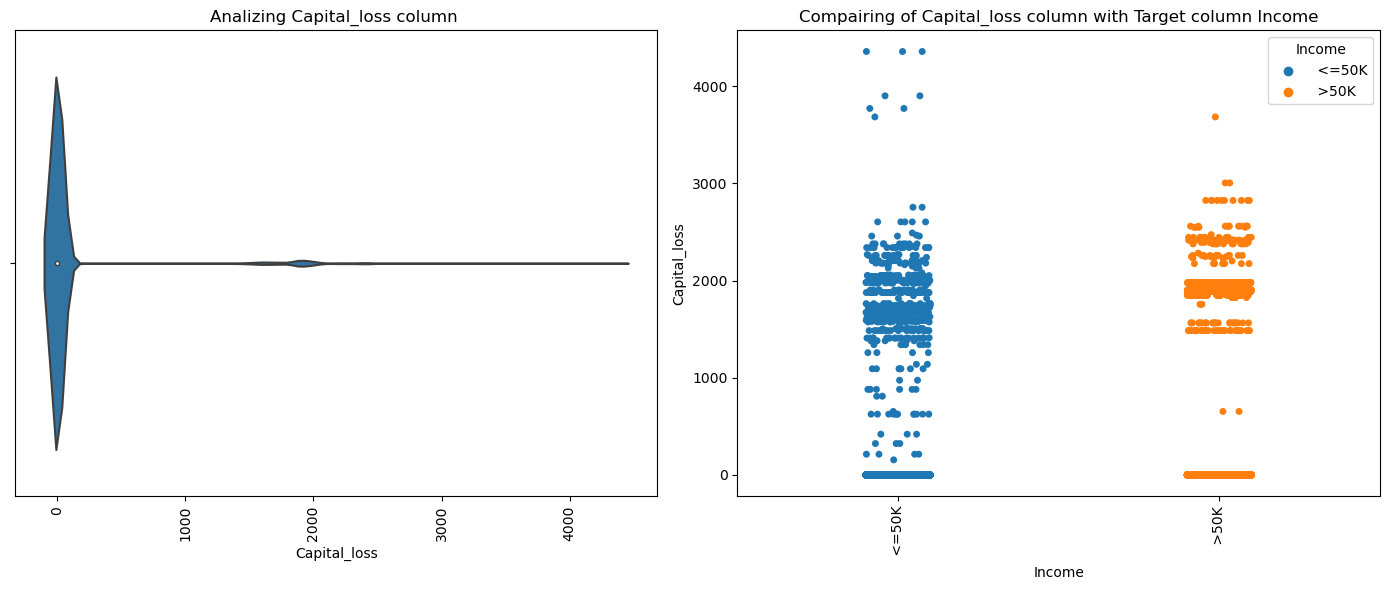

In [114]:
#Analysing Capital_loss column with Target column Income
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

sns.violinplot(x="Capital_loss", data=df)
plt.title("Analizing Capital_loss column ")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.stripplot(x="Income",y="Capital_loss",data=df,hue="Income")
plt.title("Compairing of Capital_loss column with Target column Income")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observation:-**
    
*1) Here you can see those person who loss less capital gain has a high chance of making 50k in a year.*

*2) most of the people has 0 as capital loss.*

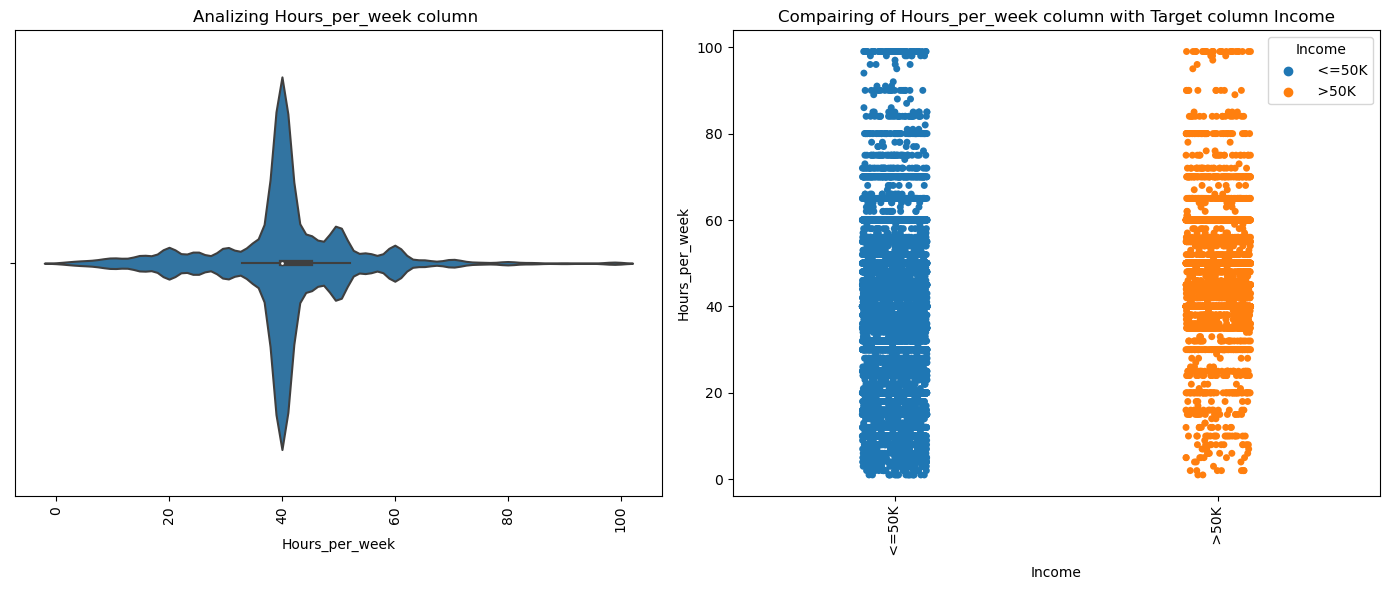

In [115]:
#Analysing Hours_per_week column with Target column Income
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

sns.violinplot(x="Hours_per_week", data=df)
plt.title("Analizing Hours_per_week column ")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.stripplot(x="Income",y="Hours_per_week",data=df,hue="Income")
plt.title("Compairing of Hours_per_week column with Target column Income")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observation:-**
    
*1) Most of the people working 40 hours in week.*

*2) Can't get any clear idea form Hours_per_week vs Income column.Will check with other plots.*

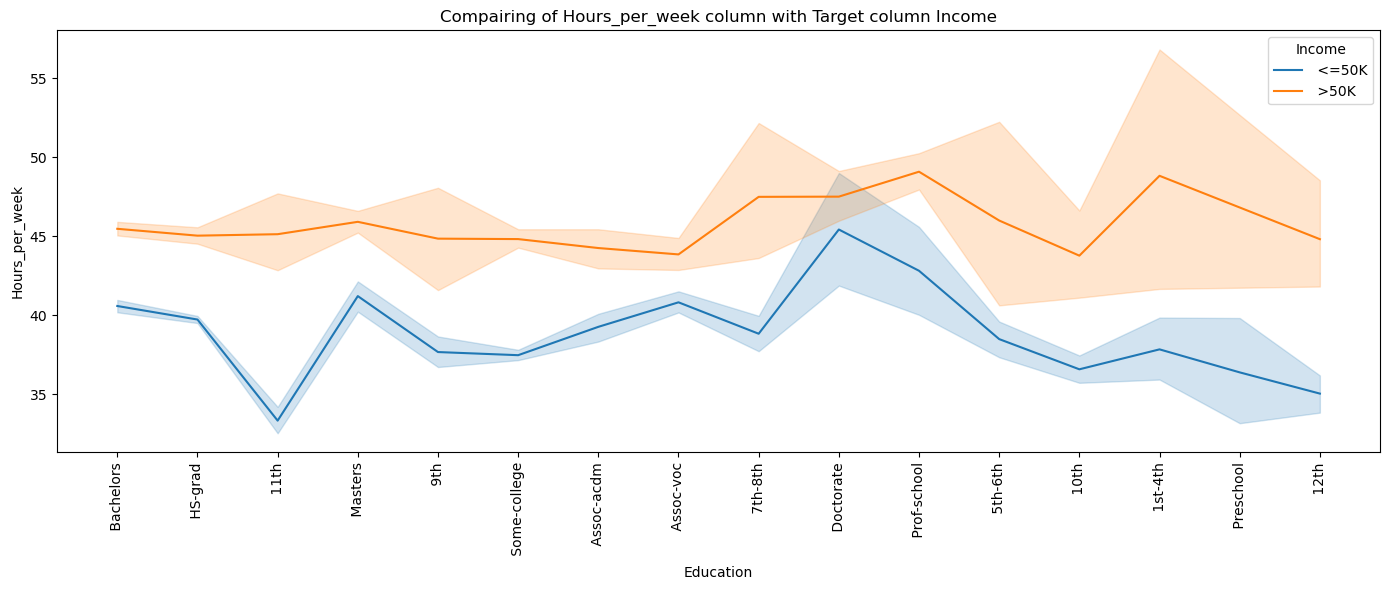

In [116]:
#Analysing Hours_per_week column with Target column Income
plt.figure(figsize=(14, 6))
sns.lineplot(x="Education",y="Hours_per_week",data=df,hue="Income")
plt.title("Compairing of Hours_per_week column with Target column Income")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observation:-**
    
*1) Those who are working for more hours per week have a high chance to make above 50K in a year.*

*2) People who are unable to make above 50k in a year had work less hours compare to those who get the above 50k in a year.*

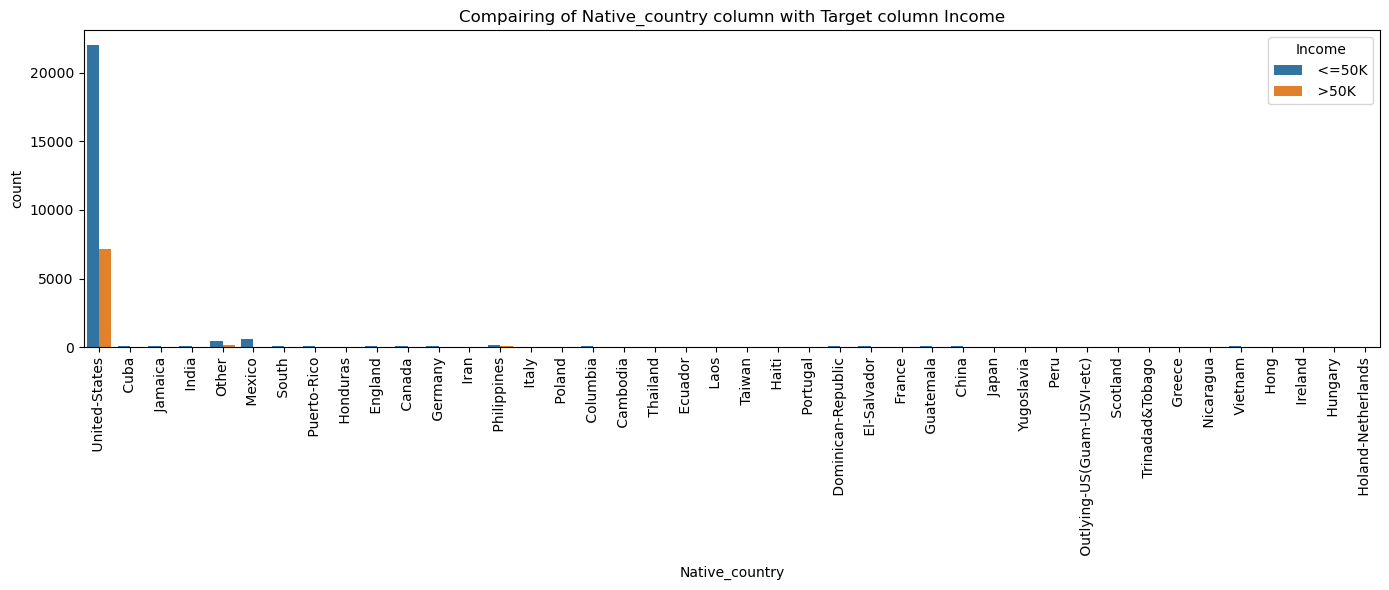

In [117]:
#Analysing Native_country column with Target column Income
plt.figure(figsize=(14, 6))
sns.countplot(x="Native_country",data=df,hue="Income")
plt.title("Compairing of Native_country column with Target column Income")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observation:-**
    
*Those who native country is USA atleast 25% of them has  chance to make above 50k in a year.*

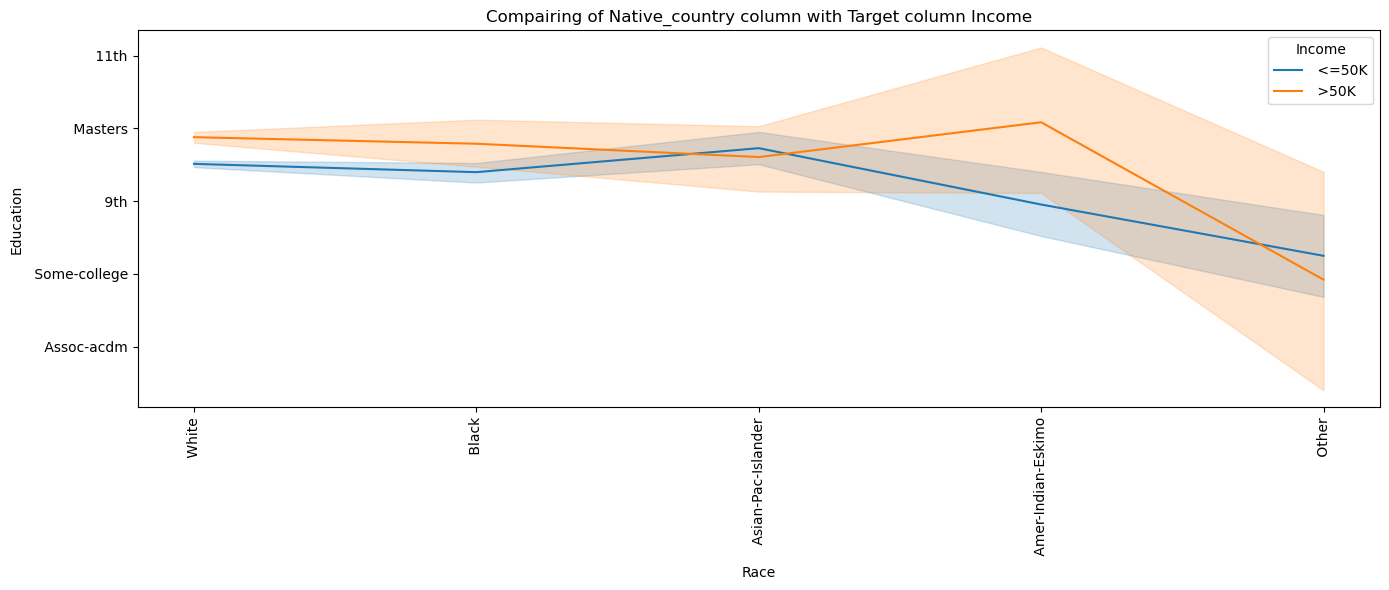

In [118]:
#Analysing Native_country column with Target column Income
plt.figure(figsize=(14, 6))
sns.lineplot(x="Race",y="Education",data=df,hue="Income")
plt.title("Compairing of Native_country column with Target column Income")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observation:-**
    
*1) Here you can see Amer-Indian-Eskimo ethnicity people literacy rate is higher and for that their chance of making above 50K is a year is higher.*

**Multivariate Analysis**

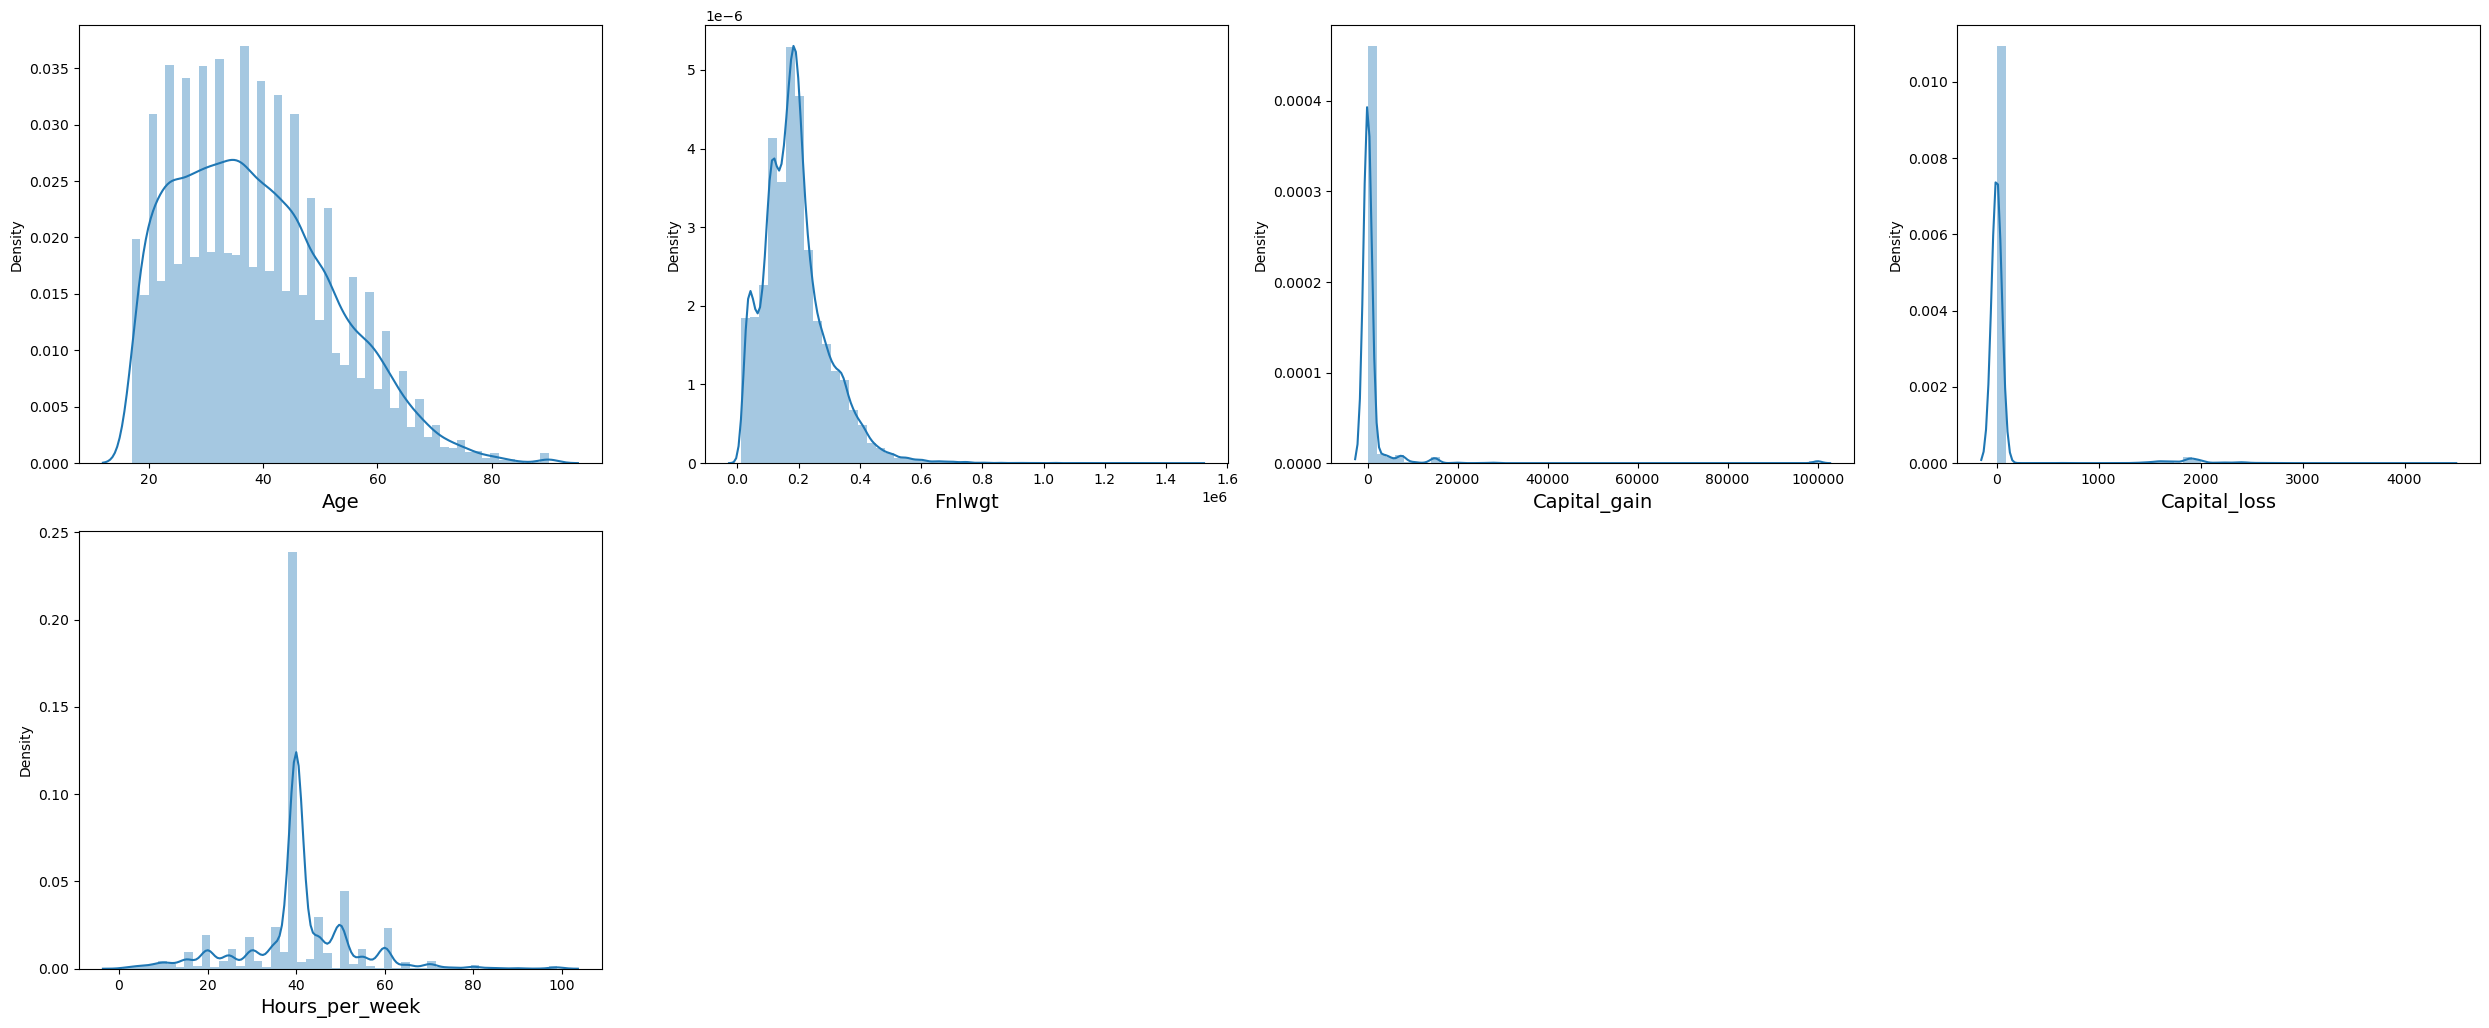

In [123]:
#Analysing data distribution of all numeric columns

plt.figure(figsize=(25,20))
p=1
for i in df.columns:
    
    if p<20:
        if df[i].dtype=="object":
            continue
        plt.subplot(4,4,p)
        sns.distplot(x=df[i])
        plt.xlabel(i,fontsize=14)
    p+=1
    
plt.tight_layout()
plt.show()

**Observation:-**
    
*1) Here you can see only Hours_per_week column data is almost normaly distributed and apart from these no one column is close to normal distribution.*

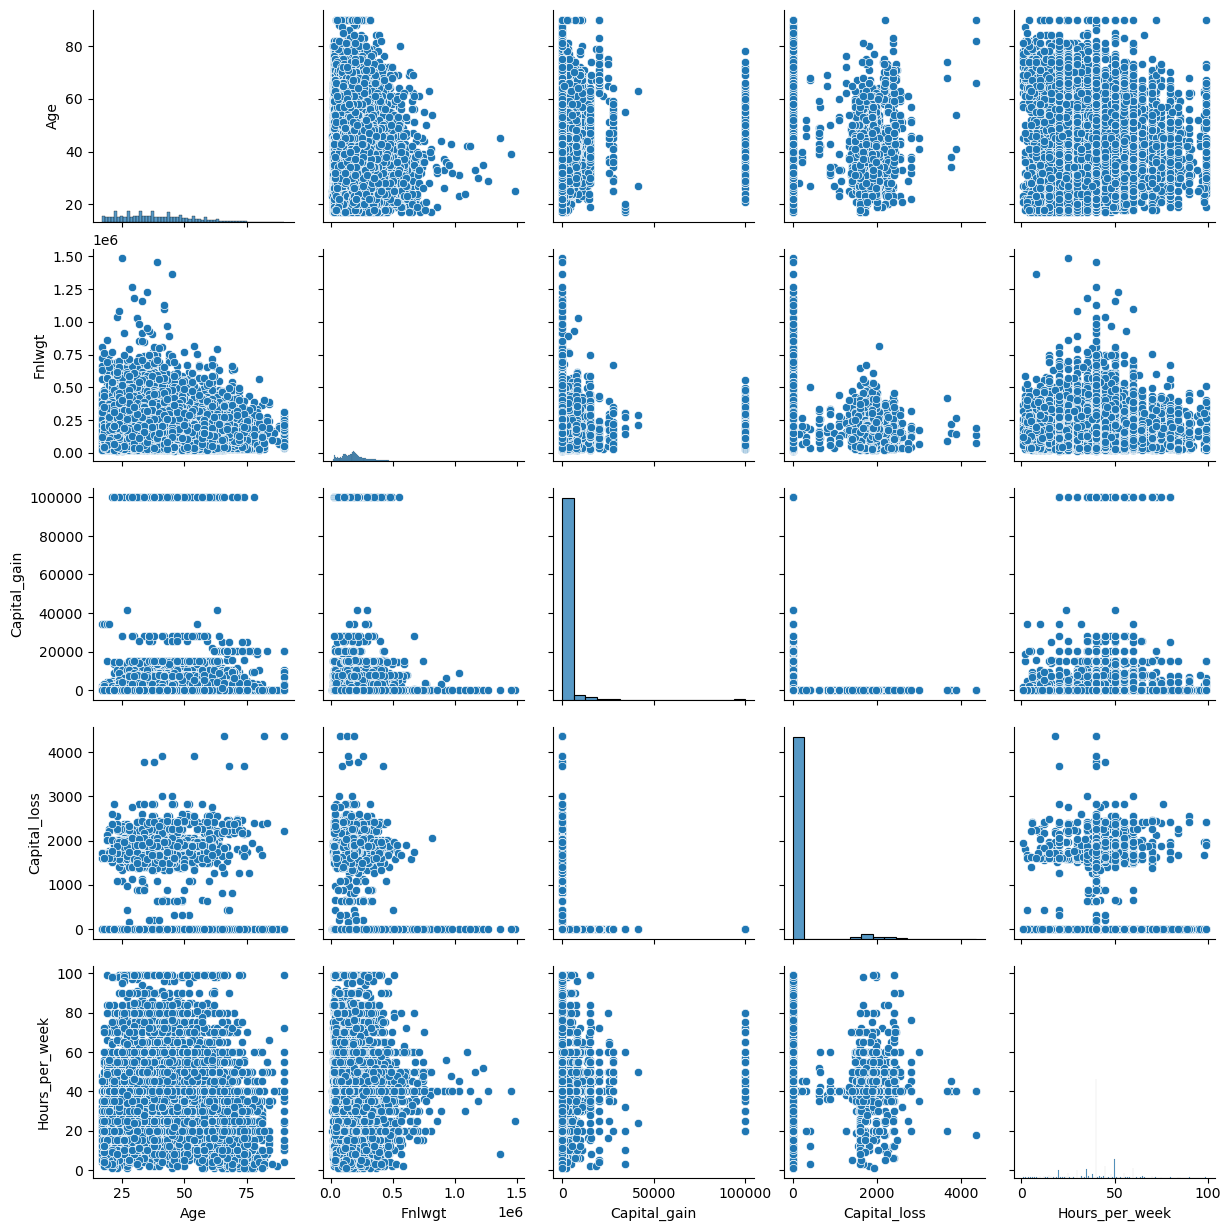

In [131]:
#pairplot
sns.pairplot(df)

# Checking for outliers

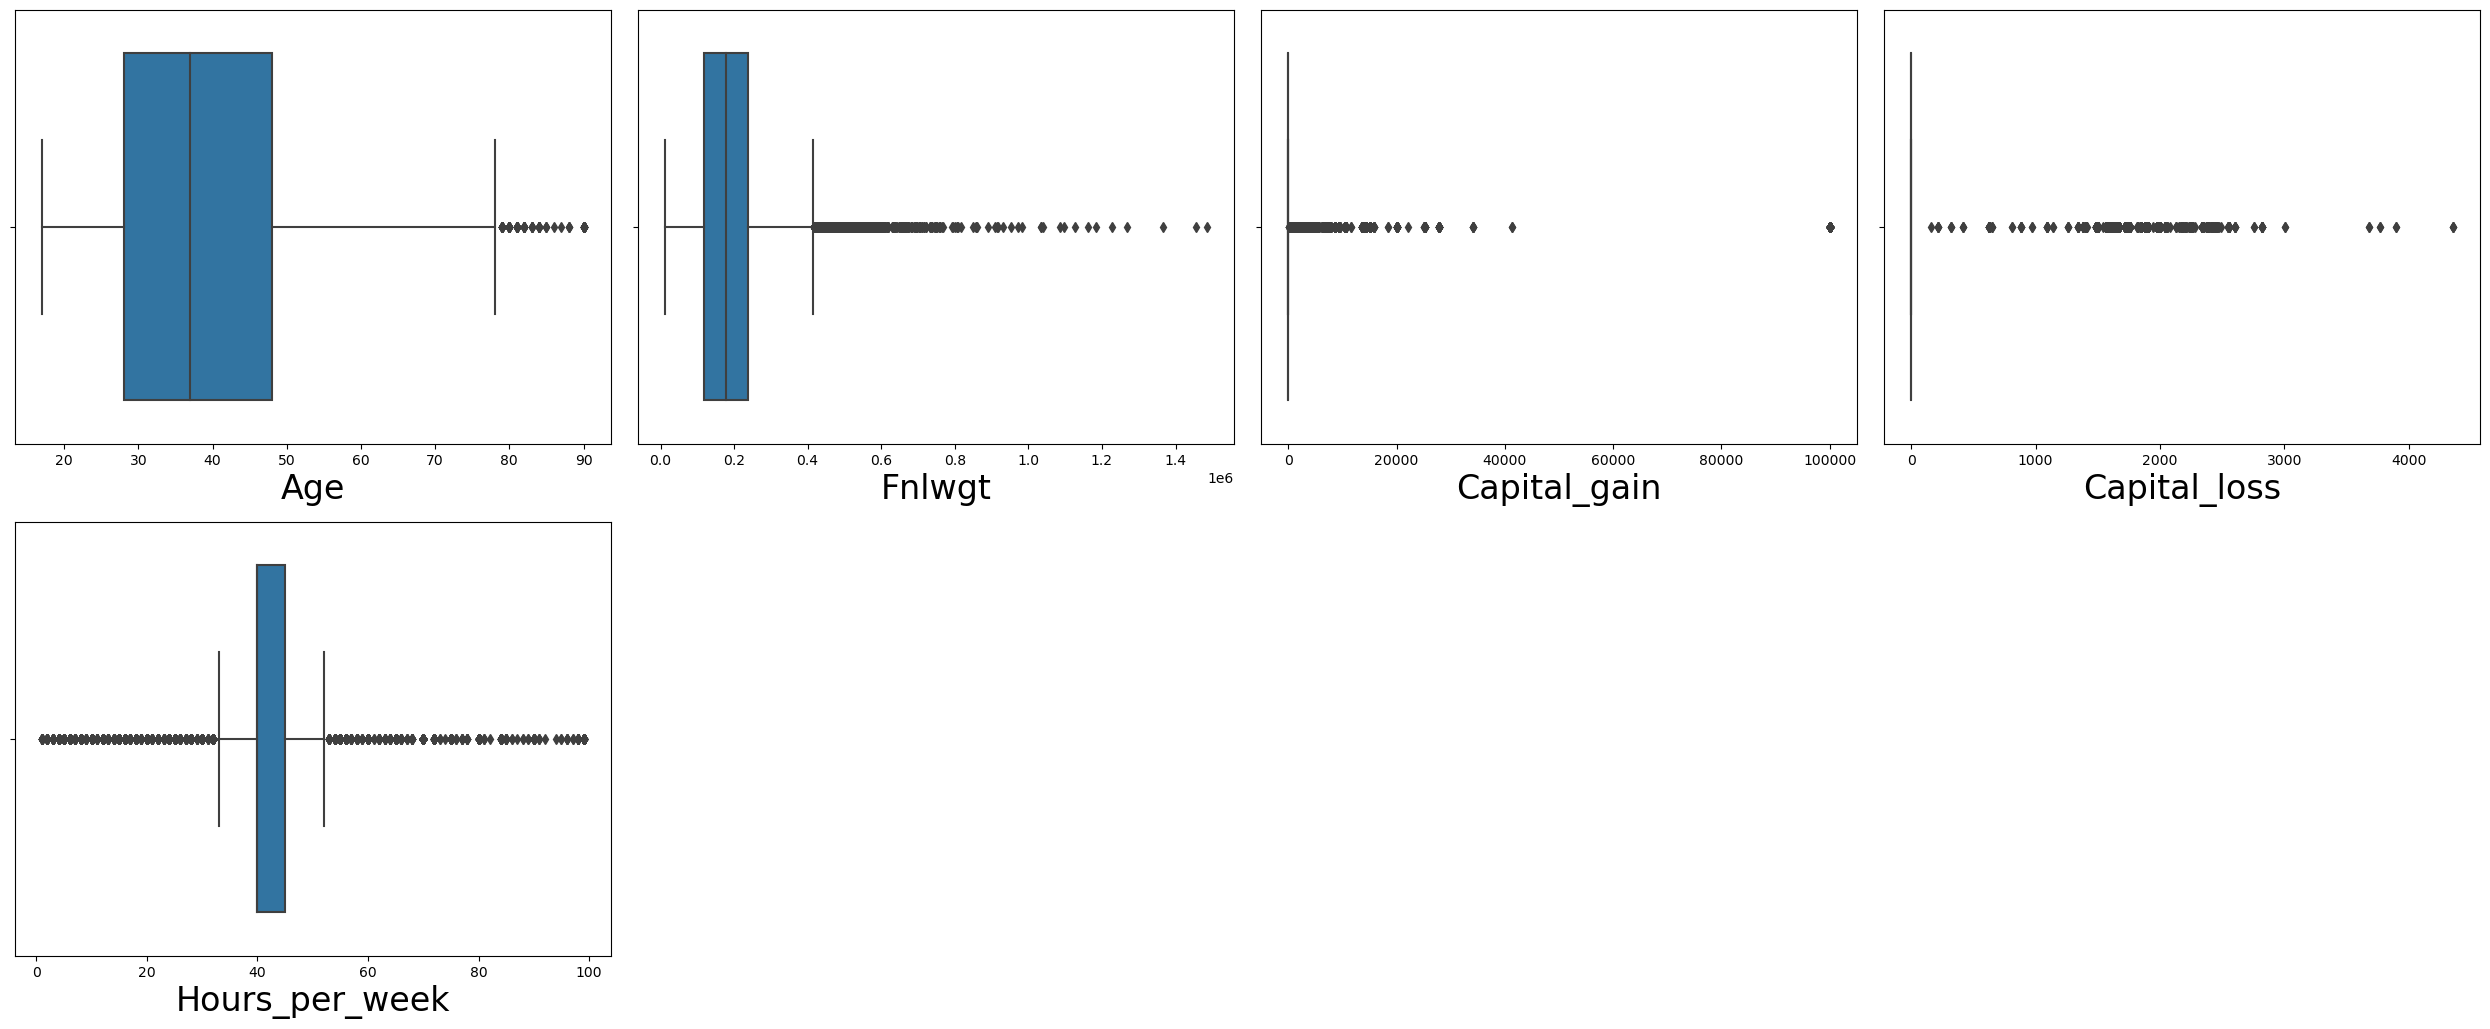

In [133]:
Ordinal_col=["Age","Fnlwgt","Capital_gain","Capital_loss","Hours_per_week"]

#Here I avoid all categorical columns and oyr Target column that is Income
plt.figure(figsize=(25,20))
p=1
for i in Ordinal_col:
    
    if p<16:
        
        plt.subplot(4,4,p)
        sns.boxplot(x=df[i],data=df)
        plt.xlabel(i,fontsize=24)
        
    p+=1
    
plt.tight_layout()
plt.show()

**Here you can see all ordinal columns has outliers and we have to remove that.**

# Removing outliers

In [134]:
#Inculding all columns those have outliers
out=df[["Age","Fnlwgt","Capital_gain","Capital_loss","Hours_per_week"]]
from scipy.stats import zscore
z=np.abs(zscore(out))
z

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
0,0.836961,1.008703,0.145969,0.216747,2.222450
1,0.042934,0.245008,0.145969,0.216747,0.035664
2,1.056935,0.425720,0.145969,0.216747,0.035664
3,0.776180,1.408036,0.145969,0.216747,0.035664
4,0.116259,0.898091,0.145969,0.216747,0.035664
...,...,...,...,...,...
32555,0.849505,0.639647,0.145969,0.216747,0.197648
32556,0.103715,0.335469,0.145969,0.216747,0.035664
32557,1.423558,0.358812,0.145969,0.216747,0.035664
32558,1.216128,0.110897,0.145969,0.216747,1.655506


In [135]:
#Locating outliers location
np.where(z>3)

(array([    9,    22,    27, ..., 32500, 32500, 32506], dtype=int64),
 array([4, 3, 4, ..., 0, 4, 4], dtype=int64))

In [136]:
#Finding outliers location by giving their location
z.iloc[9,4]

3.204018209367117

**Here you can see the value is more that 3 thats mean it's an outlier.**

# Creating outlier free Dataset

In [137]:
new_df=df[(z<3).all(axis=1)]
new_df

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [138]:
print("Old DataFrame",df.shape[0])
print("New DataFrame",new_df.shape[0])

Old DataFrame 32536
New DataFrame 30006


In [139]:
#Calculating Data lost percentage after using zscore and  removeing outliers
print("Data lost parcentage:-",((df.shape[0]-new_df.shape[0])/df.shape[0])*100)

Data lost parcentage:- 7.77600196705188


**Here you can see our dta lost percentage is below 10 and also it's a huge dataset so I can afford this much data lost.** 

# Checking Skewness

In [140]:
new_df.skew().to_frame("Skewness value")

,Skewness value
Age,0.489089
Fnlwgt,0.634650
Capital_gain,4.955914
Capital_loss,29.750401
Hours_per_week,-0.349780


**Observation:-**

*1) Our acceptable range for skewness value is +0.5 to -0.5.So here you can see Fnlwgt,Capital_loss,Capital_gain these columns are not falling under the acceptable range so we have to reduce these column's skewness values.*

# Reduceing skewness

In [141]:
#Trying to reduce skewness using cube root method
a=new_df["Fnlwgt"]
b=new_df["Capital_loss"]
c=new_df["Capital_gain"]

a=np.cbrt(a)
b=np.cbrt(b)
c=np.cbrt(c)

print("Fnlwgt column's skewness:",a.skew())
print("Capital_loss column's skewness::",b.skew())
print("Capital_gain column's skewness::",c.skew())

Fnlwgt column's skewness: -0.3761848717568263
Capital_loss column's skewness:: 25.843329932877573
Capital_gain column's skewness:: 3.3824589563854763


**Here you can see cbrt can reduce the Fnlwgt column's skewness.So I will implement it permanently on Fnlwgt column.**

In [142]:
#Applying cbrt on Fnlwgt column
new_df["Fnlwgt"]=np.cbrt(new_df["Fnlwgt"])

In [143]:
#Checking skewness again
new_df.skew().to_frame("Skewness value")

,Skewness value
Age,0.489089
Fnlwgt,-0.376185
Capital_gain,4.955914
Capital_loss,29.750401
Hours_per_week,-0.349780


**Here you can see Fnlwgt column's skewness is in our acceptable skewness range.To rduce other two columns skewness I will try different methods.**

In [144]:
#Trying to reduce skewness using square root method

b=new_df["Capital_loss"]
c=new_df["Capital_gain"]

b=np.sqrt(b)
c=np.sqrt(c)

print("Capital_loss column's skewness::",b.skew())
print("Capital_gain column's skewness::",c.skew())

Capital_loss column's skewness:: 26.691790409893596
Capital_gain column's skewness:: 3.7010156679018476


**sqrt did not work,will try other methods.**

In [145]:
#Trying to reduce skewness using log method

b=new_df["Capital_loss"]
c=new_df["Capital_gain"]

b=np.log(b)
c=np.log(c)

print("Capital_loss column's skewness::",b.skew())
print("Capital_gain column's skewness::",c.skew())

Capital_loss column's skewness:: nan
Capital_gain column's skewness:: nan


**log method also not working.**

In [146]:
#Trying to reduce skewness using log1p method

b=new_df["Capital_loss"]
c=new_df["Capital_gain"]

b=np.log1p(b)
c=np.log1p(c)

print("Capital_loss column's skewness::",b.skew())
print("Capital_gain column's skewness::",c.skew())

Capital_loss column's skewness:: 25.186075419809082
Capital_gain column's skewness:: 3.124206856413248


**log1p also not working trying other methods.**

In [147]:
#using PowerTransformer to reduce the skewness
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer("yeo-johnson")   #yeo-johnson method works on both positive and Negative method

b=new_df["Capital_loss"]
c=new_df["Capital_gain"]


#Reshaping the columns because power transformar need 2d array instead 1d

b_reshape=b.values.reshape(-1,1)
c_reshape=c.values.reshape(-1,1)


#Now fitting the Transformer

b_transform=pt.fit_transform(b_reshape)
c_transform=pt.fit_transform(c_reshape)


#Convert the transformed array back to the DataFrame

b=pd.DataFrame(b_transform)
c=pd.DataFrame(c_transform)

print("Capital_loss column's skewness:",b.skew())
print("Capital_gain column's skewness:",c.skew())



Capital_loss column's skewness: 0    24.943713
dtype: float64
Capital_gain column's skewness: 0    3.081061
dtype: float64


**Power transformation is also not working.**

In [148]:
#Appliing boxcox to Ba (Barium) 
from scipy.stats import boxcox
try:
    
    b=new_df["Capital_loss"]
    c=new_df["Capital_gain"]

    b=boxcox(b)
    c=boxcox(c)


    print("Capital_loss column's skewness:",b.skew())
    print("Capital_gain column's skewness:",c.skew())
    
    
except:
    print("Data must be positive")

Data must be positive


**Final Observation:-**
    
*Till now I applied al transformation like log,log1p,boxcox,PowerTransformer,cbrt,sqrt but I am unable to reduce Capital_loss and Capital_gain column skewness so I can consider these skewness value is their default value and we have to ignore it.*

# Checking the distribution again

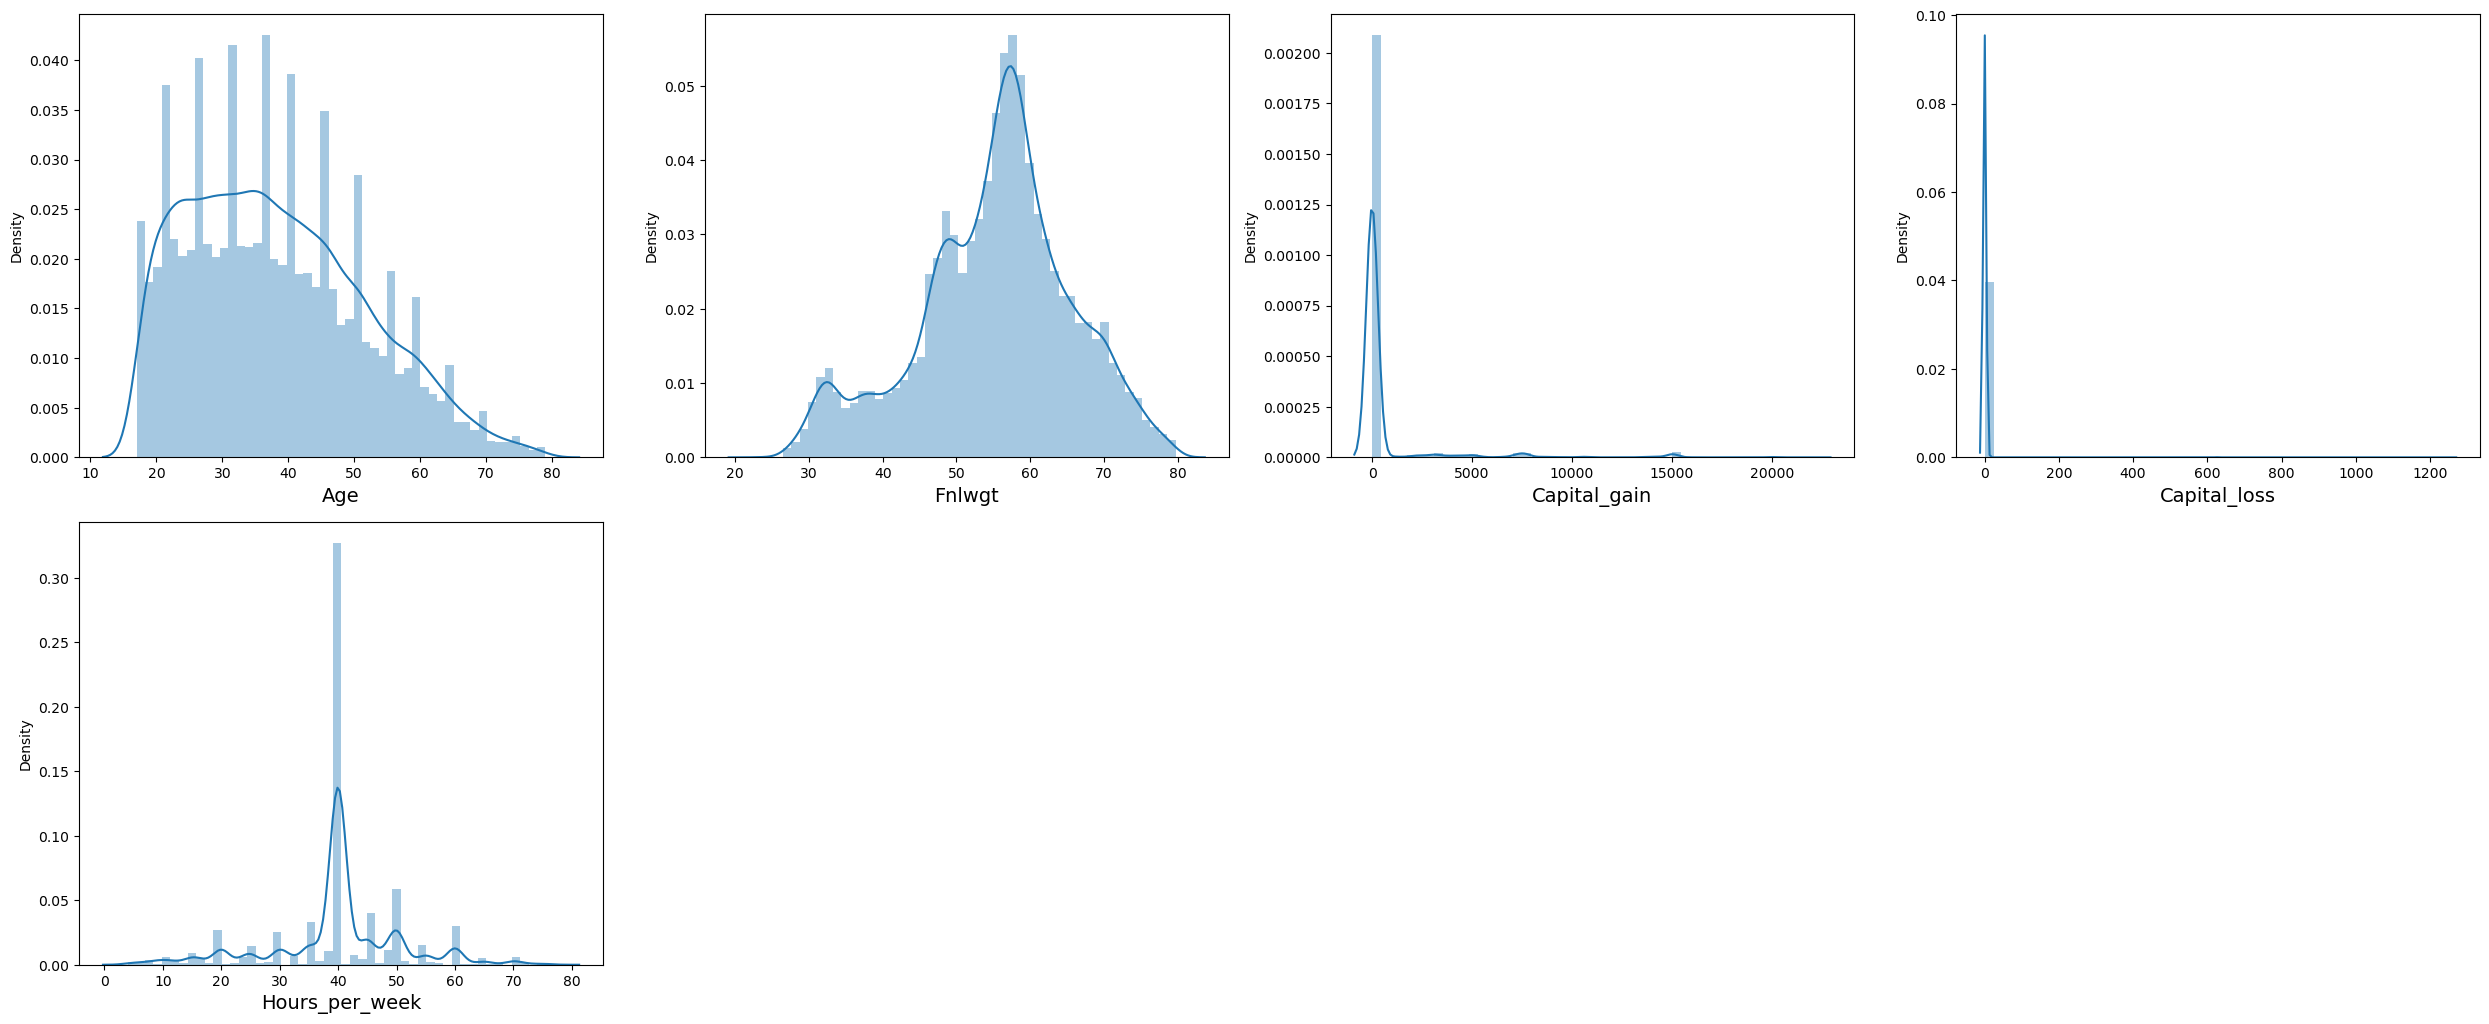

In [149]:
#Analysing data distribution of all numeric columns

plt.figure(figsize=(25,20))
p=1
for i in new_df.columns:
    
    if p<20:
        if new_df[i].dtype=="object":
            continue
        plt.subplot(4,4,p)
        sns.distplot(x=new_df[i])
        plt.xlabel(i,fontsize=14)
    p+=1
    
plt.tight_layout()
plt.show()

**Observation:-**
    
*Now you can see after reducing the skewness Fnlwgt column's data distribution look like normally distributed.*

# Encoding Categorical Columns

In [160]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()

for col in new_df.columns:
    if new_df[col].dtypes=="object":
        new_df[col]=LE.fit_transform(new_df[col])
        
new_df

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,43.675121,9,2,3,0,4,1,0,0,13,37,0
1,38,3,59.967204,11,0,5,1,4,1,0,0,40,37,0
2,53,3,61.685627,1,2,5,0,2,1,0,0,40,37,0
3,28,3,69.686283,9,2,9,5,2,0,0,0,40,4,0
4,37,3,65.776255,12,2,3,5,4,0,0,0,40,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,63.603506,7,2,12,5,4,0,0,0,38,37,0
32556,40,3,53.644440,11,2,6,0,4,1,0,0,40,37,1
32557,58,3,53.357498,11,6,0,4,4,0,0,0,40,37,0
32558,22,3,58.625222,11,4,0,3,4,1,0,0,20,37,0


# Correlation for numeric columns

In [167]:
new_df.corr()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.043950,-0.063017,-0.012235,-0.283633,0.005931,-0.266207,0.025191,0.086188,0.129784,0.020599,0.089187,-0.003675,0.236480
Workclass,0.043950,1.000000,-0.021235,-0.018328,0.042075,0.311855,0.011995,0.018008,0.002278,-0.010523,-0.008154,-0.102618,0.000962,-0.059692
Fnlwgt,-0.063017,-0.021235,1.000000,-0.025032,0.027069,-0.005113,0.009381,-0.004947,0.024417,0.000065,0.001649,-0.015807,-0.066847,-0.005376
Education,-0.012235,-0.018328,-0.025032,1.000000,-0.035896,-0.046232,-0.009290,0.016043,-0.030755,0.027317,-0.000641,0.056969,0.078749,0.074709
Marital_status,-0.283633,0.042075,0.027069,-0.035896,1.000000,0.051791,0.185415,-0.066363,-0.124481,-0.068405,-0.013830,-0.195484,-0.018336,-0.194497
Occupation,0.005931,0.311855,-0.005113,-0.046232,0.051791,1.000000,-0.013983,-0.008175,0.028256,0.001593,-0.002107,-0.065871,0.000503,0.007582
Relationship,-0.266207,0.011995,0.009381,-0.009290,0.185415,-0.013983,1.000000,-0.116413,-0.576998,-0.089970,0.028779,-0.256652,-0.010715,-0.244886
Race,0.025191,0.018008,-0.004947,0.016043,-0.066363,-0.008175,-0.116413,1.000000,0.090217,0.023651,0.001366,0.045756,0.110945,0.071995
Sex,0.086188,0.002278,0.024417,-0.030755,-0.124481,0.028256,-0.576998,0.090217,1.000000,0.070420,-0.026306,0.234158,0.002672,0.208889
Capital_gain,0.129784,-0.010523,0.000065,0.027317,-0.068405,0.001593,-0.089970,0.023651,0.070420,1.000000,-0.008993,0.097300,0.010892,0.342829


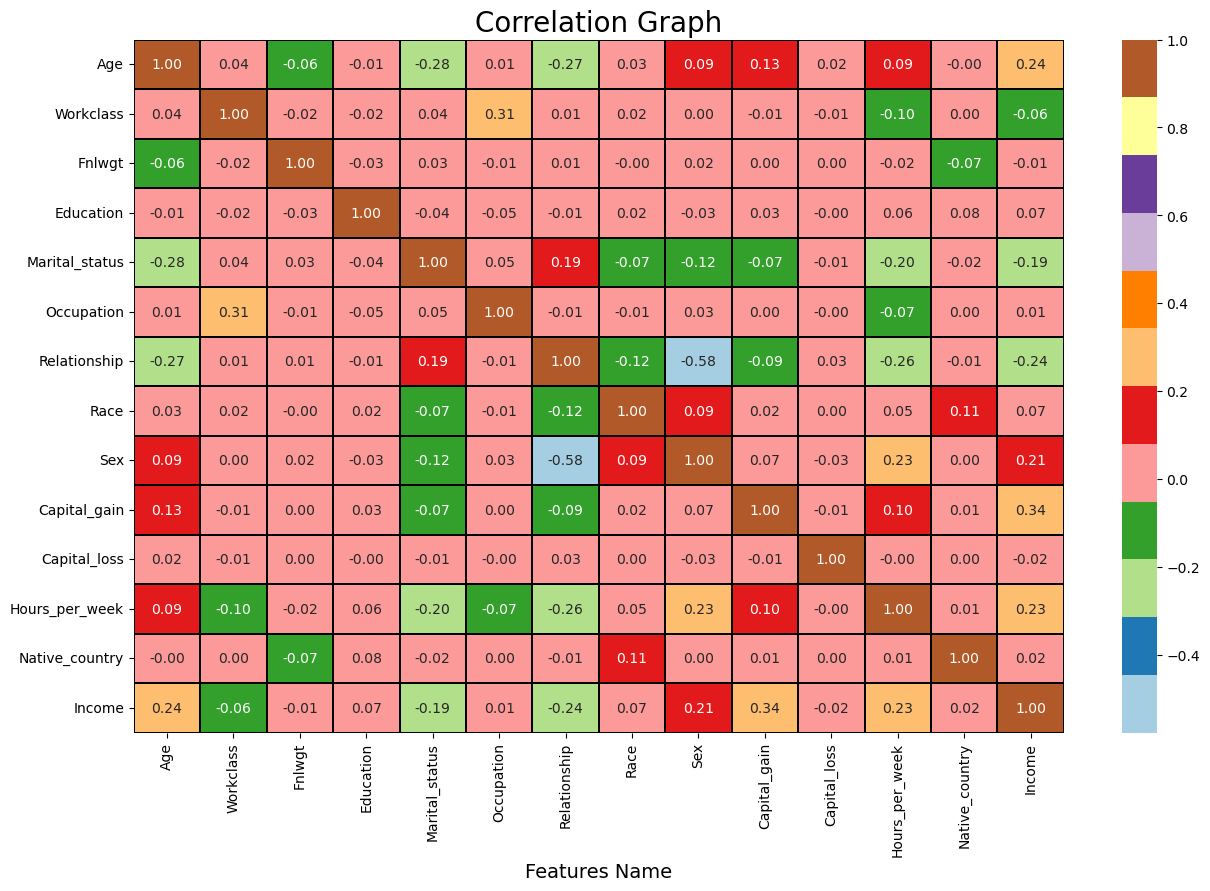

In [168]:
#Visualizing Correlation of all numerical columns using heatmap
plt.figure(figsize=(15,9))
sns.heatmap(new_df.corr(),cmap="Paired",fmt="0.2f",linewidth="0.2",linecolor="black",annot=True)
plt.xlabel("Features Name",fontsize=14)
plt.title("Correlation Graph",fontsize=20)
plt.show()

**Observation:-**
    
*Not a single column has strong correlation with each other either positive or negative.*

In [169]:
new_df.corr()["Income"].sort_values(ascending=True)

Relationship     -0.244886
Marital_status   -0.194497
Workclass        -0.059692
Capital_loss     -0.016470
Fnlwgt           -0.005376
Occupation        0.007582
Native_country    0.021635
Race              0.071995
Education         0.074709
Sex               0.208889
Hours_per_week    0.230511
Age               0.236480
Capital_gain      0.342829
Income            1.000000
Name: Income, dtype: float64

**Ovservation:-**
    
*1) Here you can see Relationship has most negatively correlation with Income.*

*2) Capital_gain is most positively correlated with our Target column income.*

# Separating Target variable and Features

In [170]:
#Separating Target and Independent variable
x = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

print("Features Dimension",x.shape)
print("Label dimension",y.shape)

Features Dimension (30006, 13)
Label dimension (30006,)


In [171]:
x.sample(3)

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
21297,25,3,61.526923,9,2,0,5,2,0,0,0,38,37
8806,49,1,55.783175,9,4,9,1,4,0,0,0,50,37
20193,41,3,55.812511,11,2,7,0,1,1,0,0,40,2


In [172]:
y.sample(3)

8931     0
29425    1
27415    0
Name: Income, dtype: int32

# Feature scalling using StandardScaler

In [173]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.882687,1.038549,-1.104359,-0.329591,-0.411867,-0.782873,-0.918751,0.394718,0.715608,-0.243962,-0.036861,-2.412533,0.254177
1,-0.014350,-0.231299,0.460322,0.183840,-1.732427,-0.321231,-0.297317,0.394718,0.715608,-0.243962,-0.036861,0.010393,0.254177
2,1.106946,-0.231299,0.625358,-2.383317,-0.411867,-0.321231,-0.918751,-1.952703,0.715608,-0.243962,-0.036861,0.010393,0.254177
3,-0.761880,-0.231299,1.393735,-0.329591,-0.411867,0.602053,2.188418,-1.952703,-1.397414,-0.243962,-0.036861,0.010393,-5.289321
4,-0.089103,-0.231299,1.018219,0.440556,-0.411867,-0.782873,2.188418,0.394718,-1.397414,-0.243962,-0.036861,0.010393,0.254177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30001,-0.836633,-0.231299,0.809549,-0.843023,-0.411867,1.294516,2.188418,0.394718,-1.397414,-0.243962,-0.036861,-0.169083,0.254177
30002,0.135156,-0.231299,-0.146912,0.183840,-0.411867,-0.090410,-0.918751,0.394718,0.715608,-0.243962,-0.036861,0.010393,0.254177
30003,1.480711,-0.231299,-0.174470,0.183840,2.229255,-1.475336,1.566984,0.394718,-1.397414,-0.243962,-0.036861,0.010393,0.254177
30004,-1.210398,-0.231299,0.331438,0.183840,0.908694,-1.475336,0.945550,0.394718,0.715608,-0.243962,-0.036861,-1.784367,0.254177


# Checking Multi-Colinearity

In [174]:
#Finding VIF for each column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features Name"]=x.columns
vif

,VIF Values,Features Name
0,1.179799,Age
1,1.121818,Workclass
2,1.010812,Fnlwgt
3,1.016129,Education
4,1.138648,Marital_status
5,1.114621,Occupation
6,1.661528,Relationship
7,1.030294,Race
8,1.540604,Sex
9,1.028345,Capital_gain


**Observation:-**

*1) Our acceptable VIF value range is below 10 and here all of our columns VIF values are well under our acceptable range so we don't have to delete any column.*

# Over Sampling

In [176]:
#Checking our Target variable value counts
y.value_counts()

0    23349
1     6657
Name: Income, dtype: int64

**Here you can see our Target column has class imbalance issue and I have to solve it using SMOTE() method.**

In [177]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [178]:
y.value_counts()

0    23349
1     6657
Name: Income, dtype: int64

In [179]:
y1.value_counts()

0    23349
1    23349
Name: Income, dtype: int64

**Now you can see our new Target variable y1 has no class imbalance issue.**

# Modeling

# Finding the best Random State

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
MaxAcc=0
MaxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>MaxAcc:
        MaxAcc=acc
        MaxRs=i
        
print("The best accuracy score is",MaxAcc,"at Random State",MaxRs)

The best accuracy score is 0.9081370449678801 at Random State 151


# Creating train_test_split

In [181]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=MaxRs)

# Classification Algorithms

In [182]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, roc_curve

**RandomForestClassifier**

In [183]:
#Checking accuracy for RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_RFC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_RFC))
print("Classification Report:-\n",classification_report(y_test,pred_RFC))

Accuracy Score:- 0.9069950035688794
Confution Matrix:-
 [[6323  689]
 [ 614 6384]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      7012
           1       0.90      0.91      0.91      6998

    accuracy                           0.91     14010
   macro avg       0.91      0.91      0.91     14010
weighted avg       0.91      0.91      0.91     14010



**ExtraTreesClassifier**

In [184]:
#Checking accuracy for ExtraTreesClassifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_ETC=ETC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_ETC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_ETC))
print("Classification Report:-\n",classification_report(y_test,pred_ETC))

Accuracy Score:- 0.9114917915774446
Confution Matrix:-
 [[6254  758]
 [ 482 6516]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.93      0.89      0.91      7012
           1       0.90      0.93      0.91      6998

    accuracy                           0.91     14010
   macro avg       0.91      0.91      0.91     14010
weighted avg       0.91      0.91      0.91     14010



**AdaBoostClassifier**

In [185]:
#Checking accuracy for AdaBoostClassifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_ABC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_ABC))
print("Classification Report:-\n",classification_report(y_test,pred_ABC))

Accuracy Score:- 0.8625981441827266
Confution Matrix:-
 [[5900 1112]
 [ 813 6185]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      7012
           1       0.85      0.88      0.87      6998

    accuracy                           0.86     14010
   macro avg       0.86      0.86      0.86     14010
weighted avg       0.86      0.86      0.86     14010



**GradientBoostingClassifier**

In [186]:
#Checking accuracy for GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
pred_GBC=GBC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_GBC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_GBC))
print("Classification Report:-\n",classification_report(y_test,pred_GBC))

Accuracy Score:- 0.8751605995717344
Confution Matrix:-
 [[5973 1039]
 [ 710 6288]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      7012
           1       0.86      0.90      0.88      6998

    accuracy                           0.88     14010
   macro avg       0.88      0.88      0.88     14010
weighted avg       0.88      0.88      0.88     14010



**BaggingClassifier**

In [187]:
#Checking accuracy for BaggingClassifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
pred_BC=BC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_BC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_BC))
print("Classification Report:-\n",classification_report(y_test,pred_BC))

Accuracy Score:- 0.8885082084225553
Confution Matrix:-
 [[6312  700]
 [ 862 6136]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      7012
           1       0.90      0.88      0.89      6998

    accuracy                           0.89     14010
   macro avg       0.89      0.89      0.89     14010
weighted avg       0.89      0.89      0.89     14010



**DecisionTreeClassifier**

In [188]:
#Checking accuracy for DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred_DTC=DTC.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_DTC))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_DTC))
print("Classification Report:-\n",classification_report(y_test,pred_DTC))

Accuracy Score:- 0.8638115631691649
Confution Matrix:-
 [[6050  962]
 [ 946 6052]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      7012
           1       0.86      0.86      0.86      6998

    accuracy                           0.86     14010
   macro avg       0.86      0.86      0.86     14010
weighted avg       0.86      0.86      0.86     14010



**KNeighborsClassifier**

In [189]:
#Checking accuracy for KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
pred_KNN=KNN.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_KNN))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_KNN))
print("Classification Report:-\n",classification_report(y_test,pred_KNN))

Accuracy Score:- 0.8565310492505354
Confution Matrix:-
 [[5437 1575]
 [ 435 6563]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.93      0.78      0.84      7012
           1       0.81      0.94      0.87      6998

    accuracy                           0.86     14010
   macro avg       0.87      0.86      0.86     14010
weighted avg       0.87      0.86      0.86     14010



**SVC**

In [190]:
#Checking accuracy for SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,pred_svc))
print("Confution Matrix:-\n",confusion_matrix(y_test,pred_svc))
print("Classification Report:-\n",classification_report(y_test,pred_svc))

Accuracy Score:- 0.8194147037830122
Confution Matrix:-
 [[5314 1698]
 [ 832 6166]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.86      0.76      0.81      7012
           1       0.78      0.88      0.83      6998

    accuracy                           0.82     14010
   macro avg       0.82      0.82      0.82     14010
weighted avg       0.82      0.82      0.82     14010



**Observation:-**

*Based on the accuracy,Confution Matrix and Classification Report ExtraTreesClassifier is the best model till now but we all know that this is not the actual accuracy,we have to Cross check it with cross validation.*

# Cross validation

In [191]:
from sklearn.model_selection import cross_val_score

**Cross validation of RandomForestClassifier**

In [192]:
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score of RandomForestClassifier and cross validation score is:-",(accuracy_score(y_test,pred_RFC)-score.mean())*100)

[0.82366167 0.89025696 0.93072805 0.93735946 0.93414712]
0.9032306532459377
Difference between accuracy score of RandomForestClassifier and cross validation score is:- 0.37643503229417563


**Cross validation of ExtraTreesClassifier**

In [193]:
score1=cross_val_score(ETC,x1,y1)
print(score1)
print(score1.mean())
print("Difference between accuracy score of ExtraTreesClassifier and cross validation score is:-",(accuracy_score(y_test,pred_ETC)-score1.mean())*100)

[0.87162741 0.90556745 0.93072805 0.93500375 0.93275511]
0.9151363545794581
Difference between accuracy score of ExtraTreeClassifier and cross validation score is:- -0.36445630020134345


**Cross validation of AdaBoostClassifier**

In [194]:
score2=cross_val_score(ABC,x1,y1)
print(score2)
print(score2.mean())
print("Difference between accuracy score of AdaBoostClassifier and cross validation score is:-",(accuracy_score(y_test,pred_ABC)-score2.mean())*100)

[0.80631692 0.84914347 0.86616702 0.87653924 0.86990042]
0.8536134141255168
Difference between accuracy score of AdaBoostClassifier and cross validation score is:- 0.8984730057209789


**Cross validation of GradientBoostingClassifier**

In [195]:
score3=cross_val_score(GBC,x1,y1)
print(score3)
print(score3.mean())
print("Difference between accuracy score of GradientBoostingClassifier and cross validation score is:-",(accuracy_score(y_test,pred_GBC)-score3.mean())*100)

[0.81070664 0.86456103 0.88618844 0.89024521 0.88970982]
0.8682822260177154
Difference between accuracy score of GradientBoostingClassifier and cross validation score is:- 0.687837355401899


**Cross validation of BaggingClassifier**

In [196]:
score4=cross_val_score(BC,x1,y1)
print(score4)
print(score4.mean())
print("Difference between accuracy score of BaggingClassifier and cross validation score is:-",(accuracy_score(y_test,pred_BC)-score4.mean())*100)

[0.7872591  0.86970021 0.92066381 0.92675875 0.92065532]
0.8850074392734483
Difference between accuracy score of BaggingClassifier and cross validation score is:- 0.3500769149107019


**Cross validation of DecisionTreeClassifier**

In [197]:
score5=cross_val_score(DTC,x1,y1)
print(score5)
print(score5.mean())
print("Difference between accuracy score of DecisionTreeClassifier and cross validation score is:-",(accuracy_score(y_test,pred_DTC)-score5.mean())*100)

[0.76916488 0.84004283 0.89089936 0.89217261 0.89024521]
0.8565049768269326
Difference between accuracy score of DecisionTreeClassifier and cross validation score is:- 0.7306586342232246


**Cross validation of KNeighborsClassifier**

In [198]:
score6=cross_val_score(KNN,x1,y1)
print(score6)
print(score6.mean())
print("Difference between accuracy score of KNeighborsClassifier and cross validation score is:-",(accuracy_score(y_test,pred_KNN)-score6.mean())*100)

[0.84593148 0.85085653 0.86295503 0.86936503 0.87150659]
0.8601229308696716
Difference between accuracy score of KNeighborsClassifier and cross validation score is:- -0.3591881619136261


**Cross validation of SVC**

In [199]:
score7=cross_val_score(svc,x1,y1)
print(score7)
print(score7.mean())
print("Difference between accuracy score of SVC and cross validation score is:-",(accuracy_score(y_test,pred_svc)-score7.mean())*100)

[0.81017131 0.81199143 0.81584582 0.81850305 0.81668273]
0.8146388690745197
Difference between accuracy score of SVC and cross validation score is:- 0.4775834708492521


**Observation:-**

*1) Here you can see RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,KNeighborsClassifier these classifiers have the least difference between it's accuracy with it's cross_val_score.From these algos I choose ExtraTreeClassifier because it has highest accuracy with good confusion matrics.* 

*2) So we took ExtraTreesClassifier as our best model.*

# Hyper Parameter Tuning

In [200]:
#ExtraTreeClassifier
from sklearn.model_selection import GridSearchCV
paramiters={
       "n_estimators":[1,4,10,15,20],
       "random_state":[1,4,10,20],
       "criterion":["gini", "entropy", "log_loss"],
       "max_features":["sqrt", "log2", None],
       "n_jobs":[1,4,10,15,20],
       "max_depth":[1,4,10,15,20]
    
}

In [202]:
GCV=GridSearchCV(ExtraTreesClassifier(),paramiters,cv=5)

In [203]:
GCV.fit(x_train,y_train)

KeyboardInterrupt: 

# Waited for full 1 day but GridSearchCV still executing so I will go for RandomizedSearchCV

# Hyper Parameter Tuning with RandomizedSearchCV

In [212]:
#ExtraTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
paramiters={
       "n_estimators":list(range(1, 51)),
       "random_state":list(range(1, 51)),
       "criterion":["gini", "entropy", "log_loss"],
       "max_features":["sqrt", "log2", None],
       "n_jobs":list(range(1, 51)),
       "max_depth":list(range(1, 51))
    
}

In [213]:
RSCV=RandomizedSearchCV(ExtraTreesClassifier(),paramiters,cv=5)

In [214]:
RSCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                        'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...],
                                        'random_state': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]})

In [215]:
#Checking best parameters values
RSCV.best_params_

{'random_state': 30,
 'n_jobs': 20,
 'n_estimators': 50,
 'max_features': 'sqrt',
 'max_depth': 46,
 'criterion': 'log_loss'}

# Final Model

In [216]:
Final_Model=ExtraTreesClassifier(n_jobs=20,n_estimators=50,max_depth=46,max_features="sqrt",random_state=30,criterion="log_loss")
Final_Model.fit(x_train,y_train)
pred=Final_Model.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy:-",acc*100)                 

Accuracy:- 91.07066381156316


**Observation:-**

*Earlier my ExtraTreesClassifier had the accuracy of 91% and now after Hyperparameter tuning it's accuracy is 91% so it nither increase nither decrease so I can use this model.*



# Plotting ROC and compare AUC for Final Model

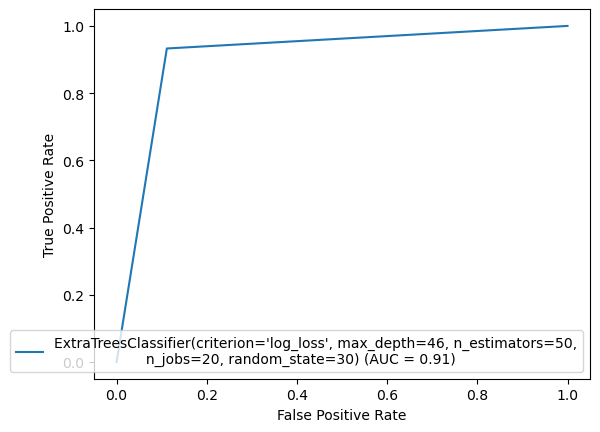

In [217]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_Model)
display.plot()

**Here you can clearly see our AUC score is 91% that very good.So my my model can clearly classify income prediction.Let's test it my will will work or not:**

# Saving the best model

**Serialization**

In [218]:
#Saving best model
import joblib
joblib.dump(Final_Model,"Income.pkl")

['Income.pkl']

**De-Serialization**

In [219]:
#Loading the model and try to make prediction with it.
Model=joblib.load("Income.pkl")

prediction=Model.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 1])

In [220]:
#Comparing orginal data with predicted one
Check=np.array(y_test)
Data=pd.DataFrame()
Data["Prediction"]=prediction
Data["Original"]=Check
Data

,Prediction,Original
0,0,0
1,0,0
2,0,1
3,0,1
4,0,0
...,...,...
14005,0,1
14006,1,1
14007,0,0
14008,0,0


**Here you can see my model predict accurately.**

# User Define Function to predict Income

In [225]:
def Income_prediction(a):
    a=a.reshape(1,-1)
    result=Model.predict(a)
    if result==0:
        print("This person can't make above 50k in a year")
        
    else:
        print("Yes! This person can make above 50k in a year")

In [226]:
data=np.array([25,3,61.526923,9,2,0,5,2,0,0,0,38,37])

In [227]:
#Calling user define function
Income_prediction(data)

This person can't make above 50k in a year


**So you can see my user define function is also working.**

# So here I built a model that determine whether a person makes over $50K in a year or not and it's working really good.Thank you.

# The End